In [3]:
import os

# 指定文件夹路径
download_path = 'E:/Dataset/wind_shear/Data_Download'
plt_save_path = '../result/WSHR/figures'
exception_save_path = '../Dataset/Exception_Data'

# 获取文件夹下的所有文件名称
file_names = os.listdir(download_path)
data_folders = [item for item in file_names if os.path.isdir(os.path.join(download_path, item))]
exception_folders = [item for item in os.listdir(exception_save_path) if os.path.isdir(os.path.join(exception_save_path, item))]
instruction_folders = ["@Instructions"]
# 打印文件名称
# for file_name in file_names:
#     print(file_name)
# for folder_name in data_folders:
#     print(folder_name)

----- Jumping Tail_652_1 -----
----- Jumping Tail_652_2 -----
----- Jumping Tail_652_3 -----
----- Jumping Tail_652_4 -----
----- Jumping Tail_652_5 -----
----- Jumping Tail_652_6 -----
----- Jumping Tail_652_7 -----
----- Jumping Tail_652_8 -----
----- Jumping Tail_653_1 -----
----- Jumping Tail_653_2 -----
----- Jumping Tail_653_3 -----
----- Jumping Tail_653_4 -----
----- Jumping Tail_653_5 -----
----- Jumping Tail_653_6 -----
----- Jumping Tail_653_7 -----
----- Jumping Tail_653_8 -----
----- Jumping Tail_654_1 -----
----- Jumping Tail_654_2 -----
----- Jumping Tail_654_3 -----
----- Jumping Tail_654_4 -----
----- Jumping Tail_654_5 -----
----- Jumping Tail_654_6 -----
----- Jumping Tail_654_7 -----
----- Jumping Tail_654_8 -----
----- Jumping Tail_655_1 -----
----- Jumping Tail_655_2 -----
----- Jumping Tail_655_3 -----
----- Jumping Tail_655_4 -----
----- Jumping Tail_655_5 -----
----- Jumping Tail_655_6 -----
----- Jumping Tail_655_7 -----
----- Jumping Tail_655_8 -----
----- Ju

C:\Users\86108\AppData\Local\Temp\ipykernel_30252\482206138.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


----- Reading Tail_668_1 -----
----- Reading Tail_668_2 -----
----- Reading Tail_668_3 -----
----- Reading Tail_668_4 -----
----- Reading Tail_668_5 -----
----- Reading Tail_668_6 -----
----- Reading Tail_668_7 -----
----- Reading Tail_668_8 -----
----- Reading Tail_668_9 -----
----- Reading Tail_669_1 -----
----- Reading Tail_669_2 -----
----- Reading Tail_669_3 -----
----- Reading Tail_669_4 -----
----- Reading Tail_669_5 -----
----- Reading Tail_669_6 -----
----- Reading Tail_669_7 -----
----- Reading Tail_669_8 -----
----- Reading Tail_669_9 -----
----- Reading Tail_670_1 -----
----- Reading Tail_670_10 -----
----- Reading Tail_670_2 -----
----- Reading Tail_670_3 -----
----- Reading Tail_670_4 -----
----- Reading Tail_670_5 -----
----- Reading Tail_670_6 -----
----- Reading Tail_670_7 -----
----- Reading Tail_670_8 -----
----- Reading Tail_670_9 -----
----- Reading Tail_671_1 -----
----- Reading Tail_671_10 -----
----- Reading Tail_671_2 -----
----- Reading Tail_671_3 -----
----- 

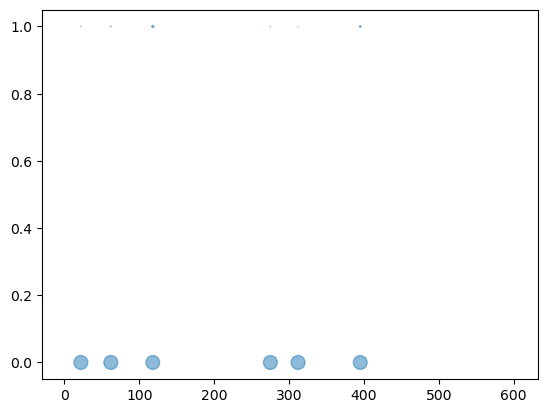

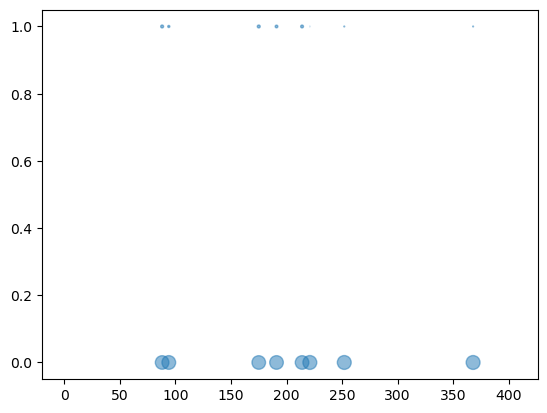

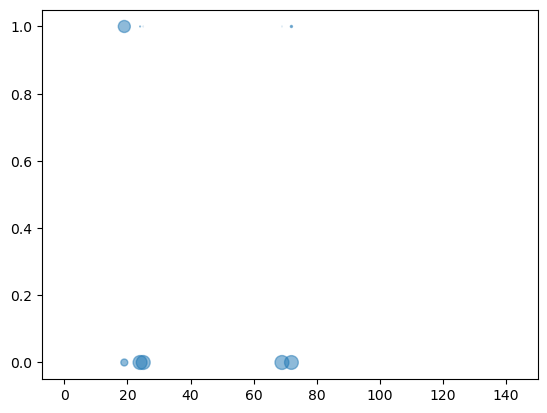

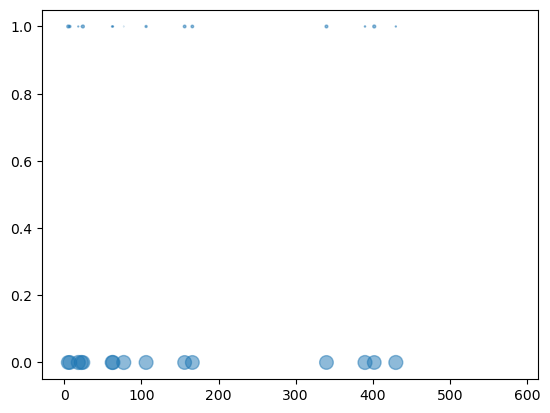

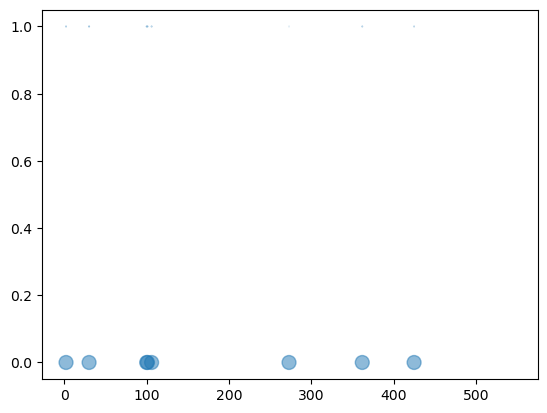

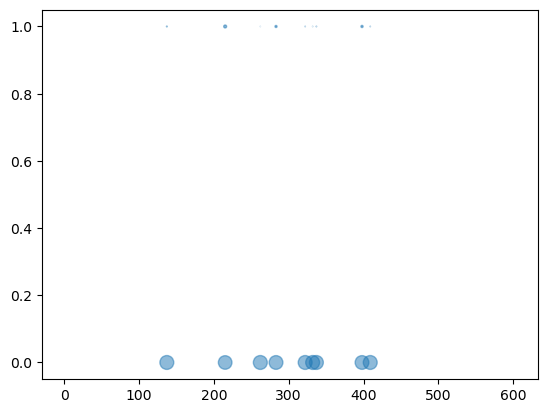

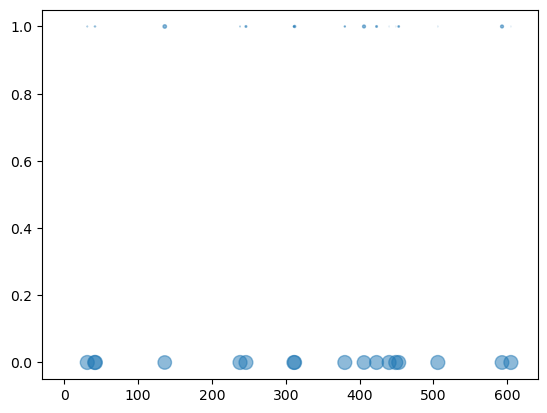

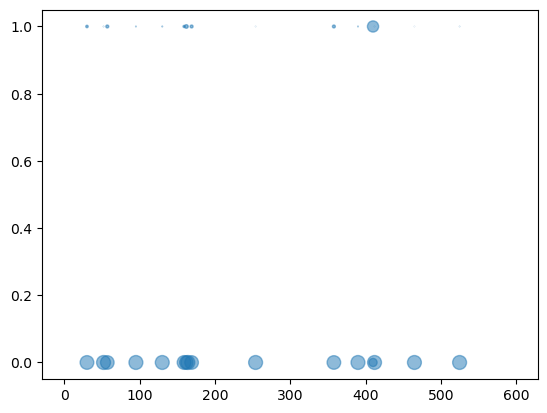

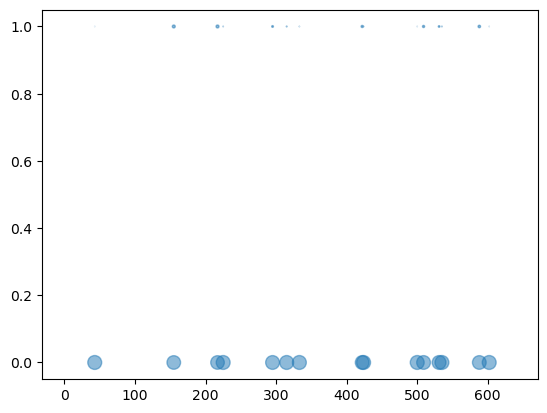

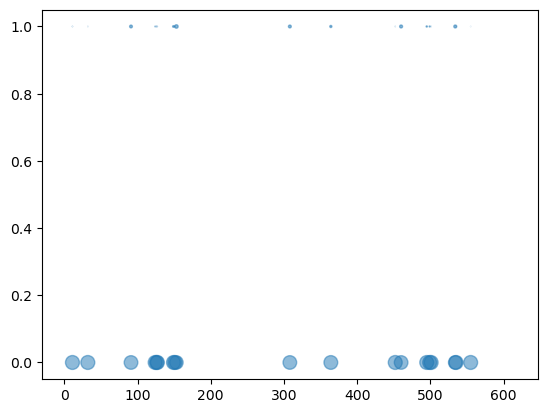

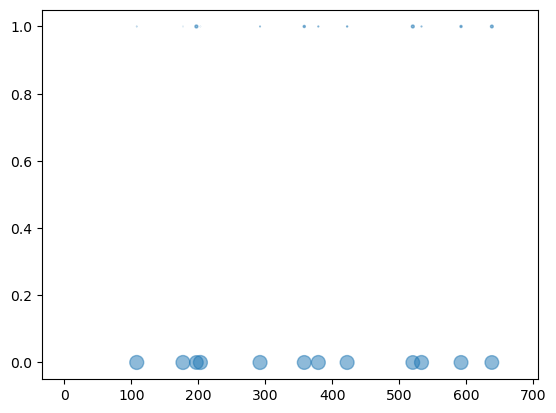

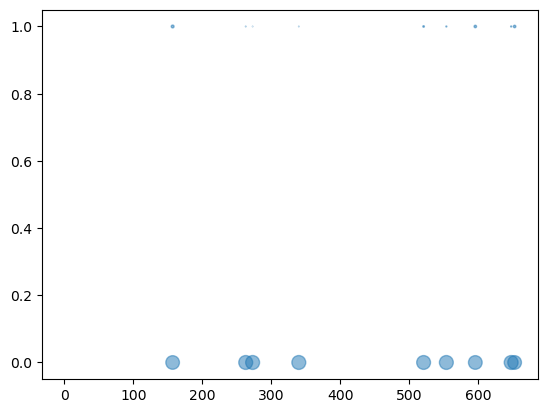

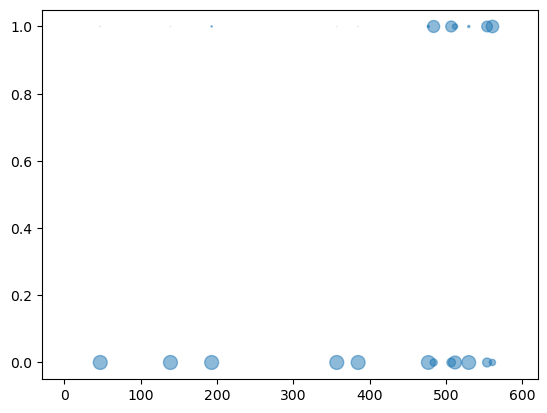

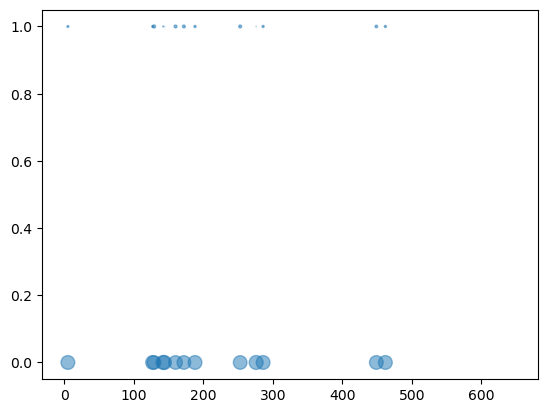

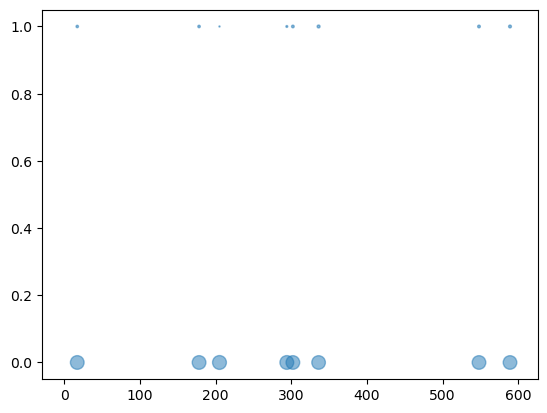

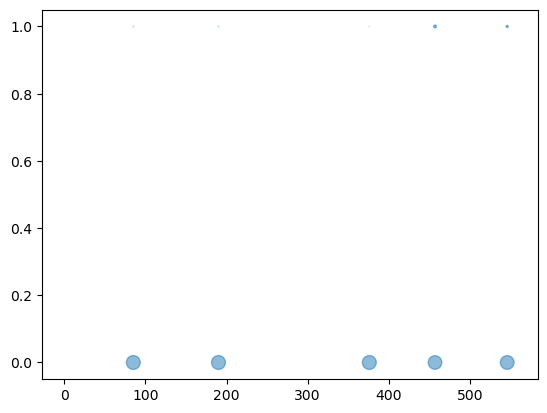

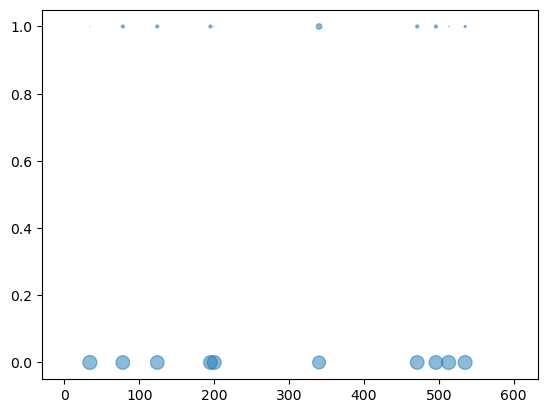

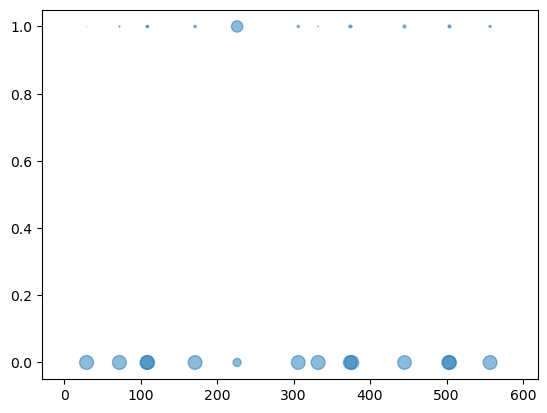

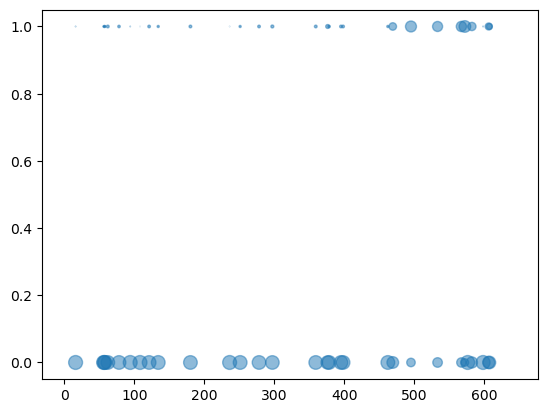

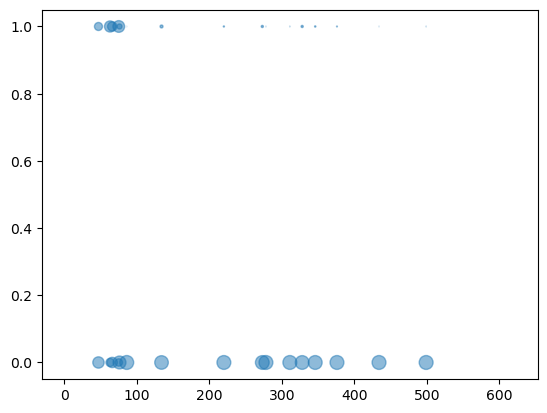

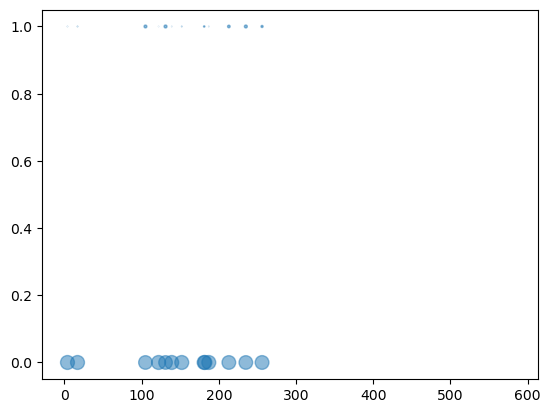

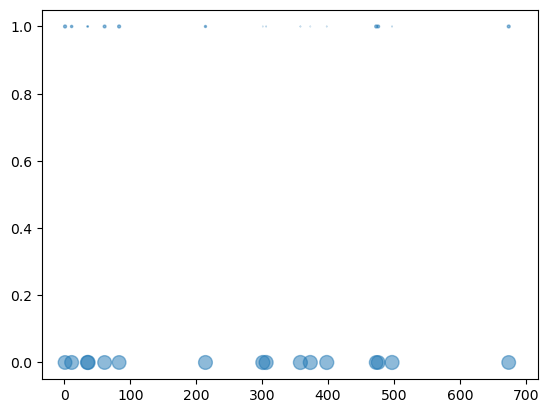

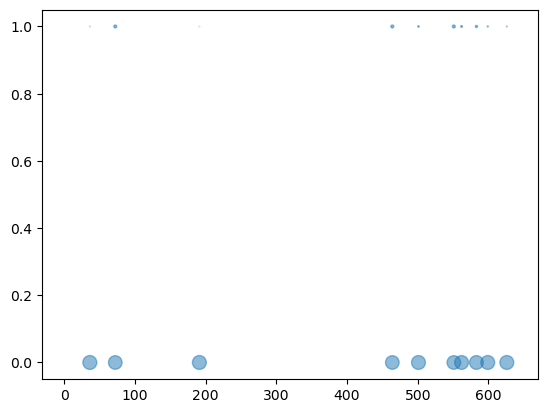

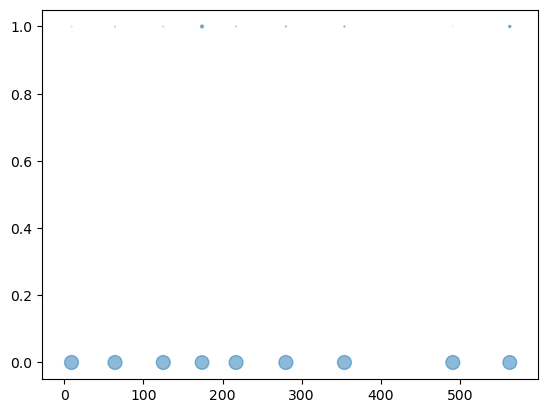

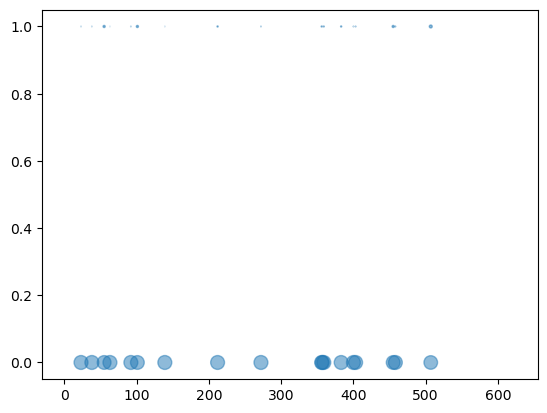

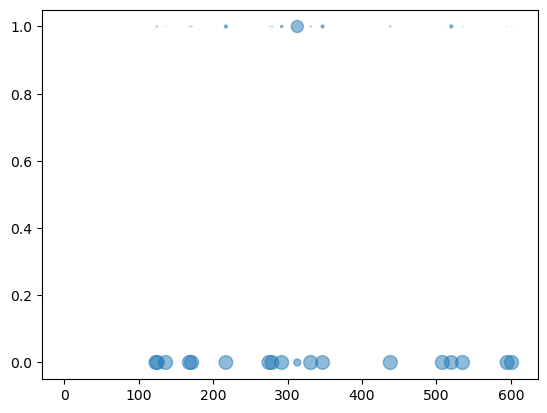

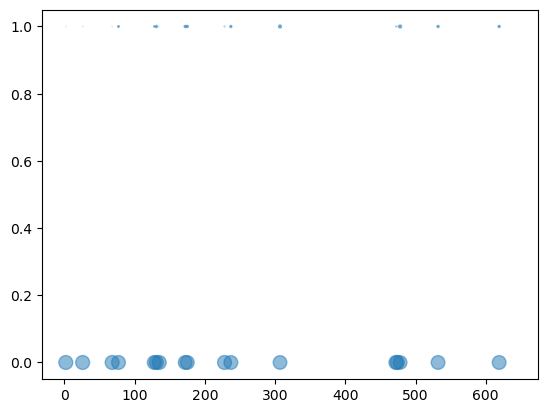

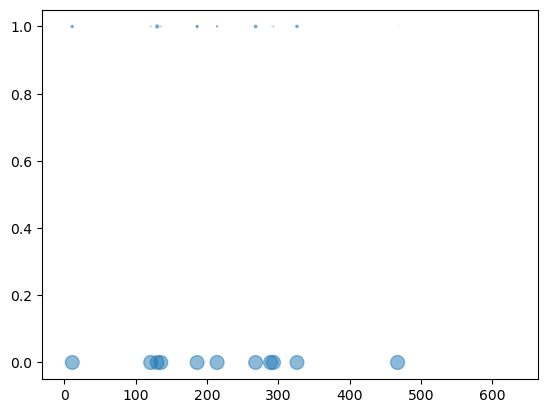

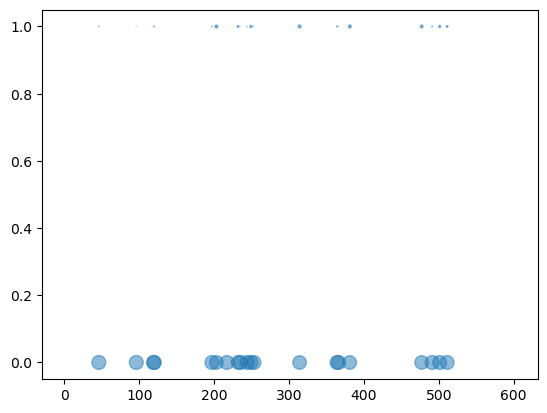

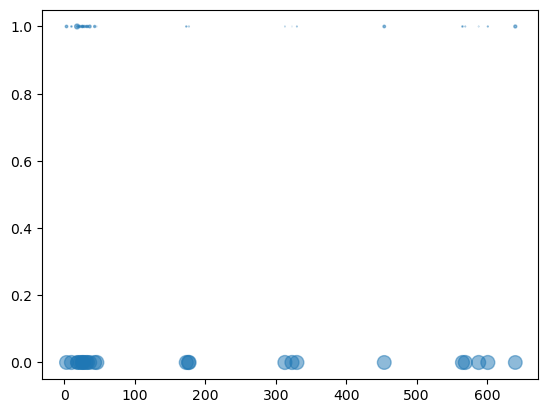

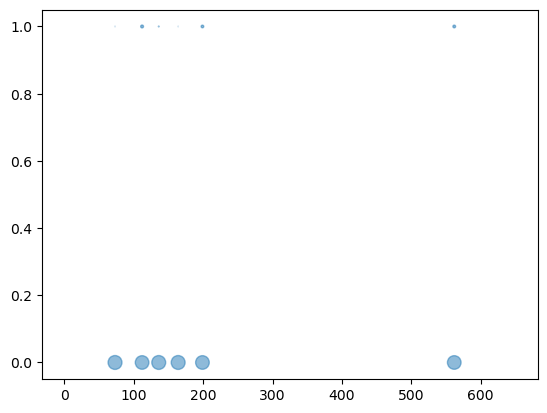

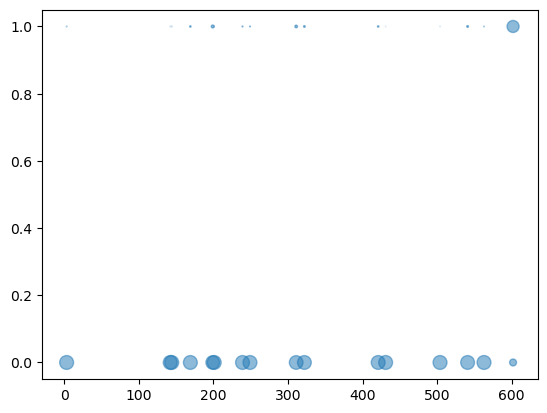

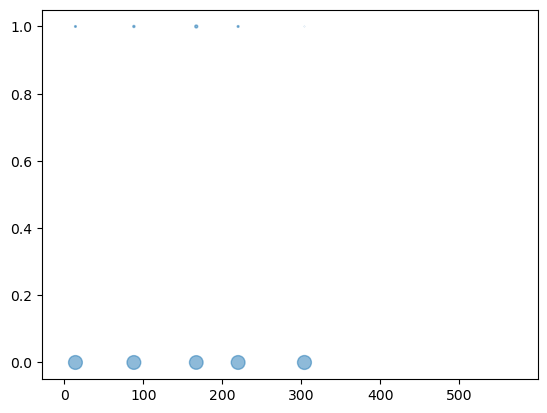

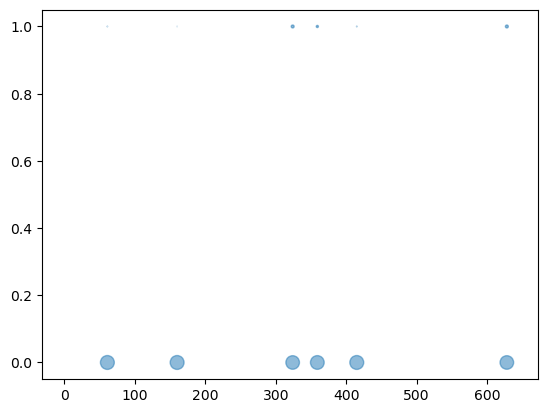

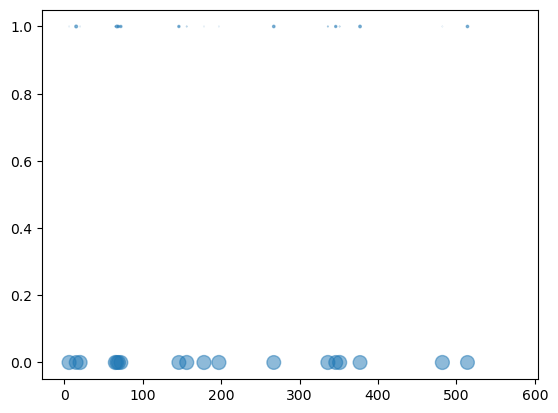

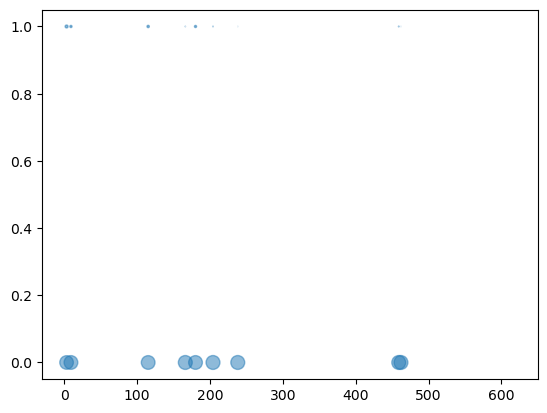

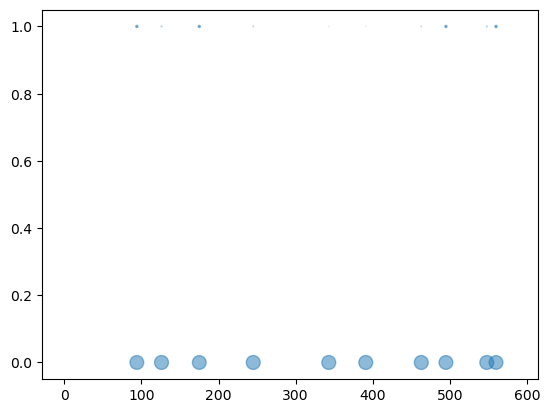

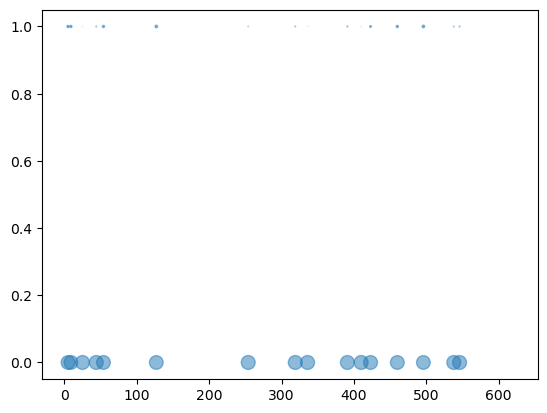

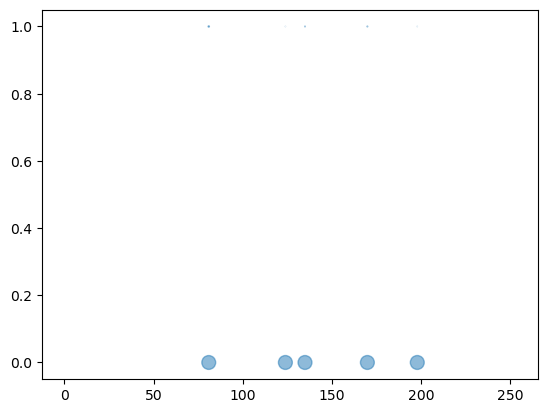

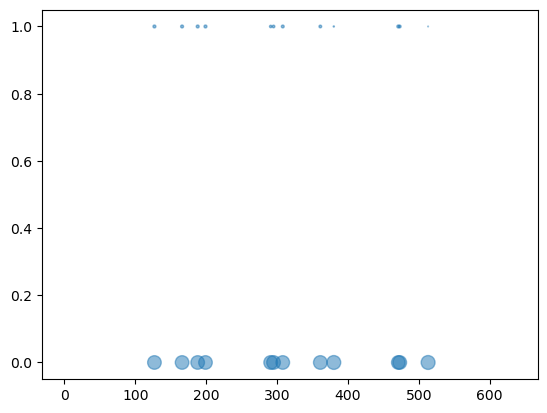

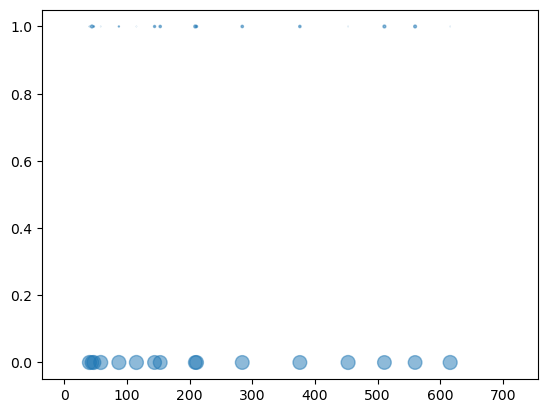

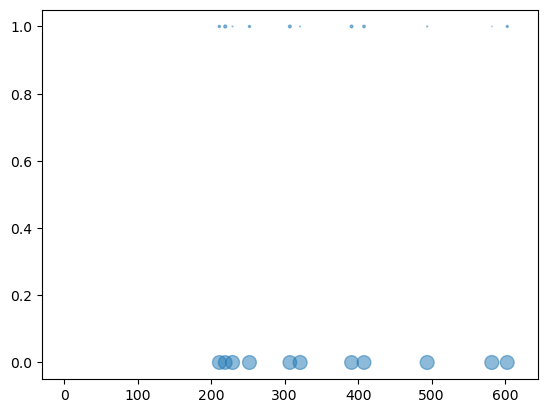

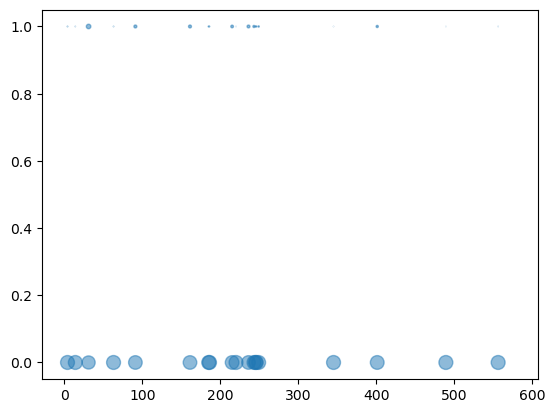

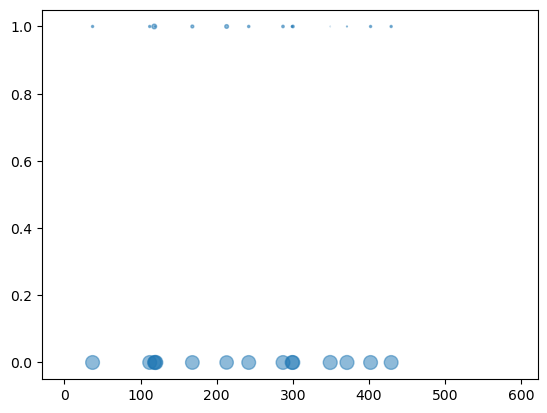

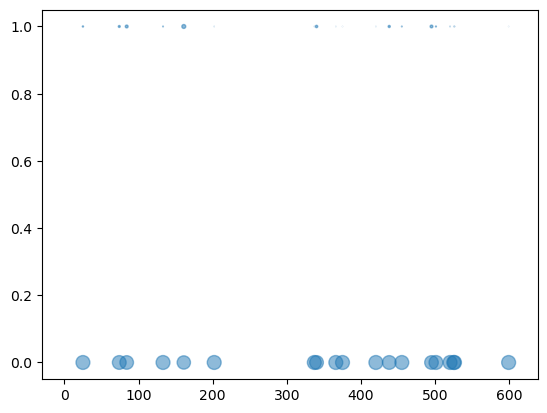

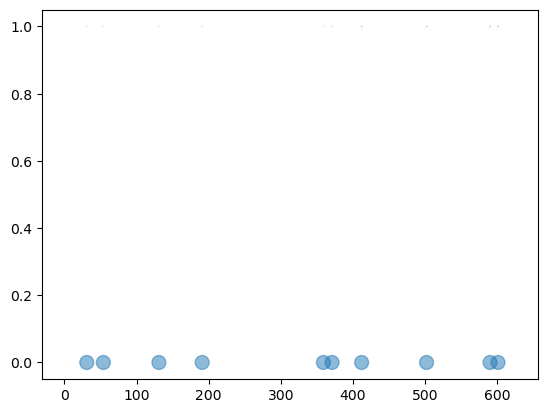

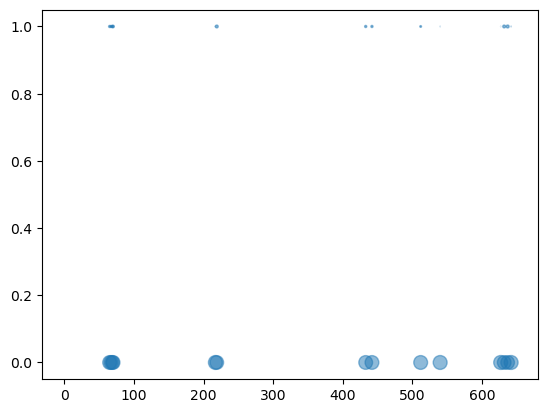

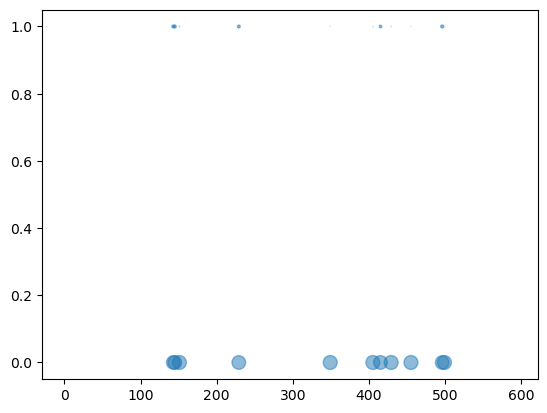

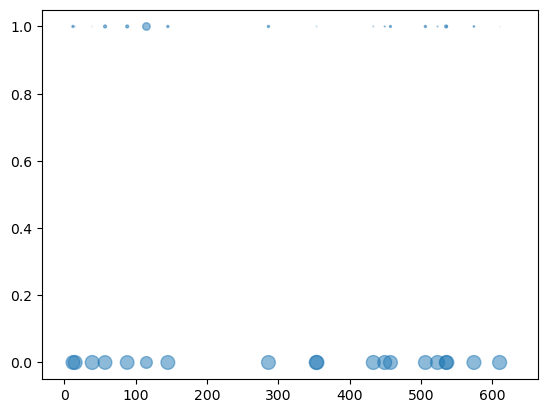

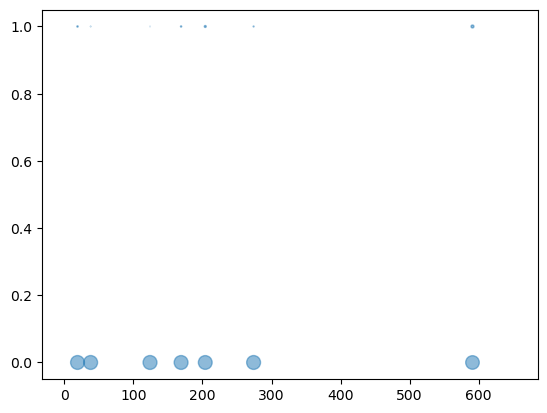

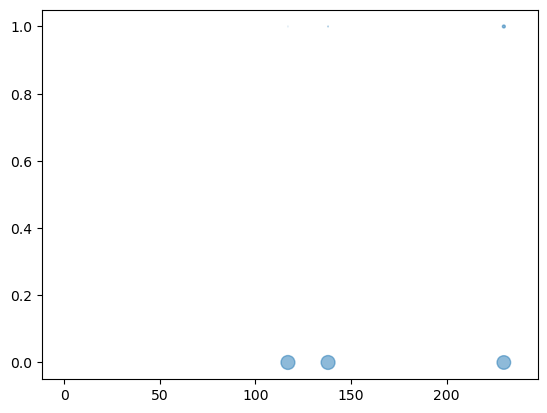

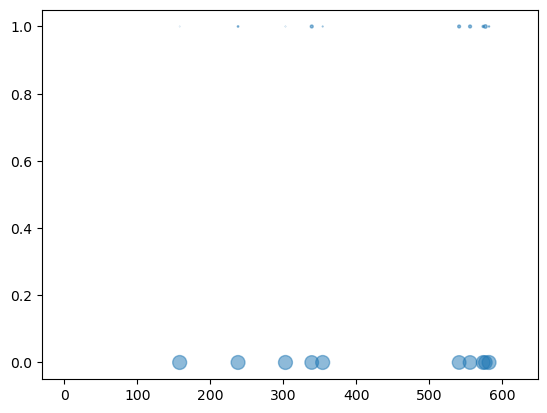

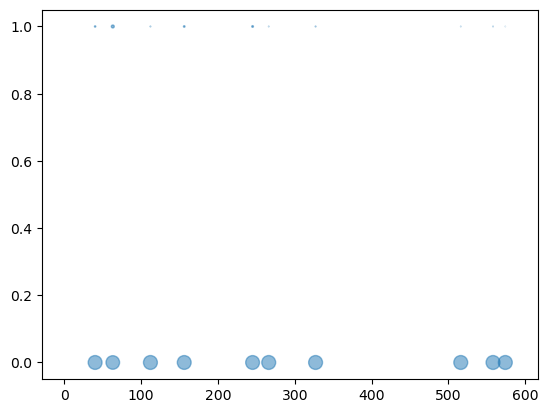

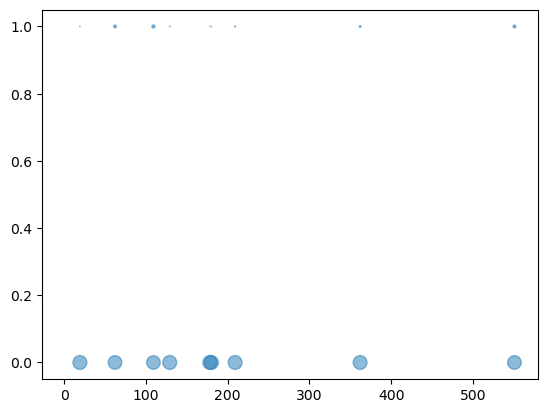

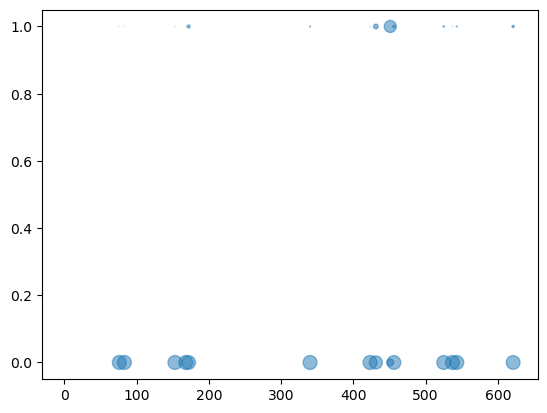

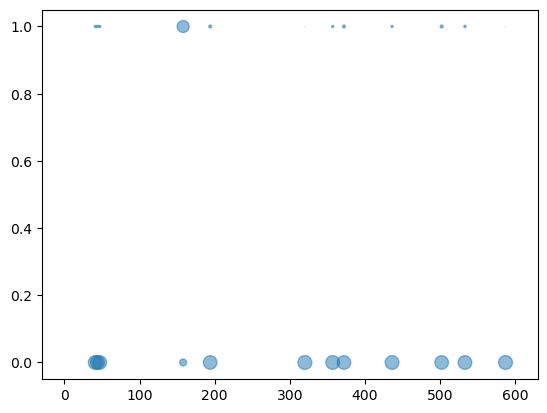

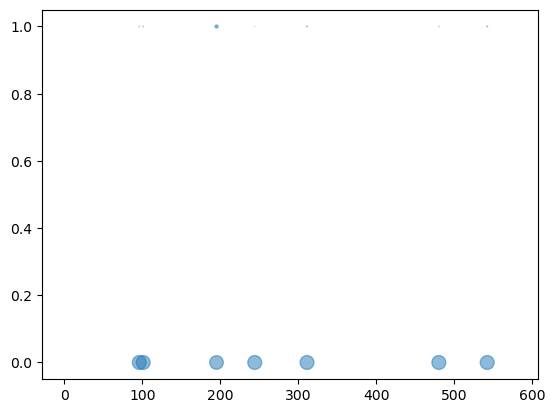

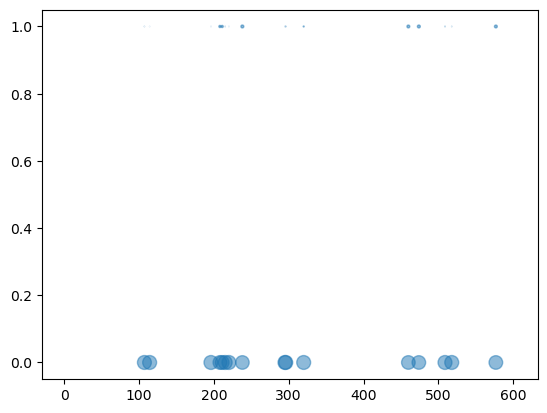

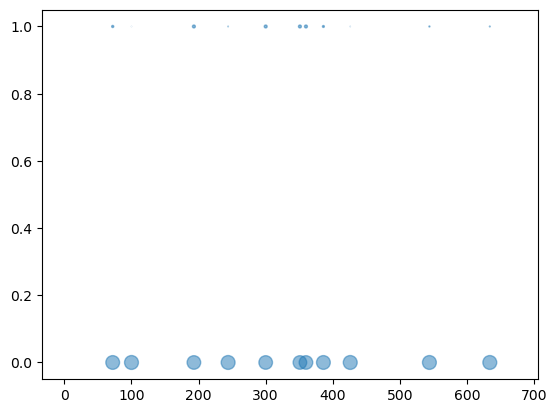

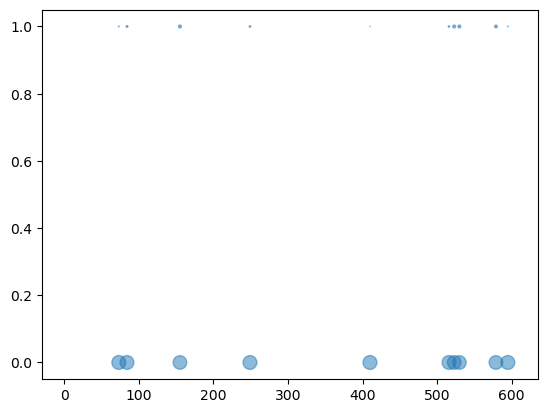

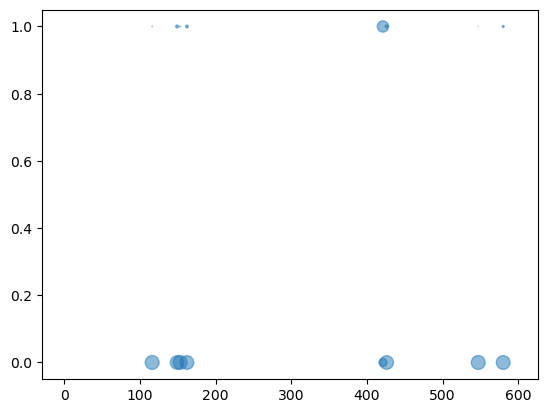

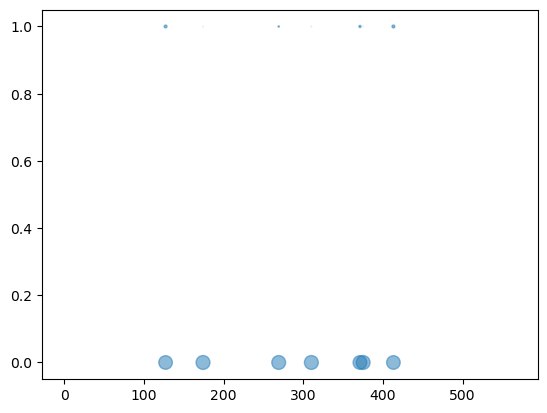

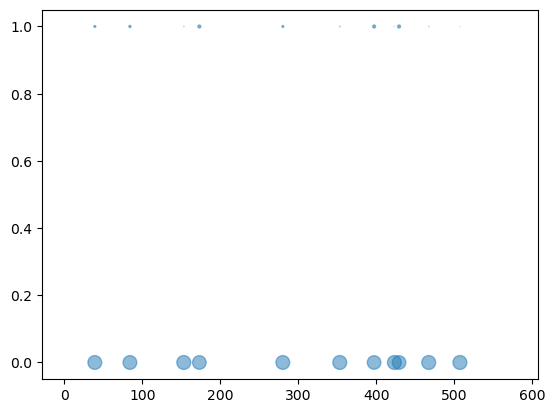

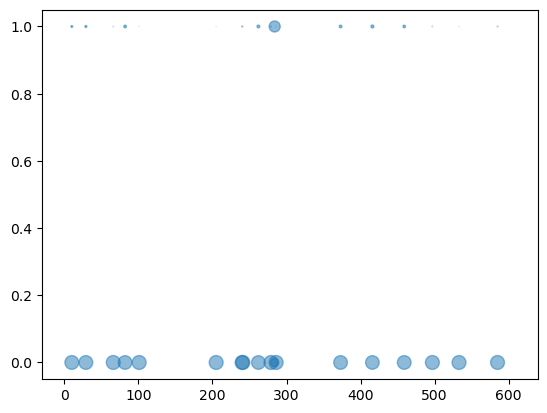

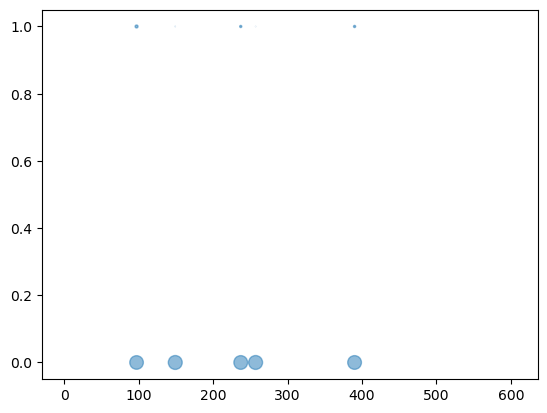

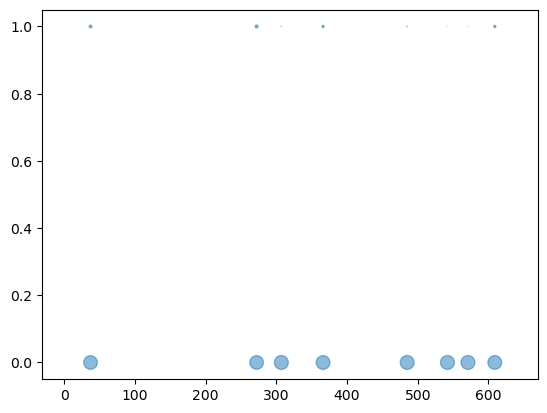

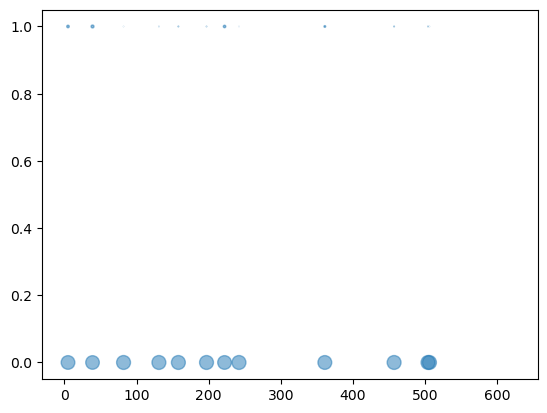

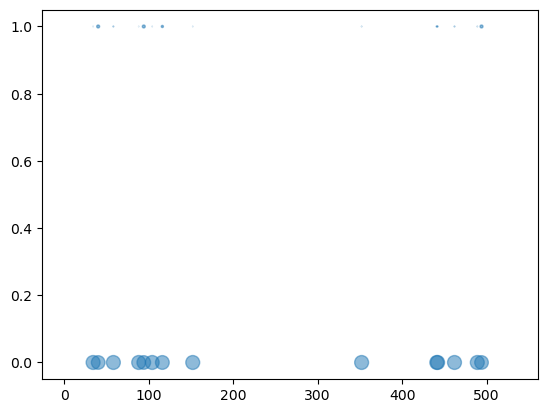

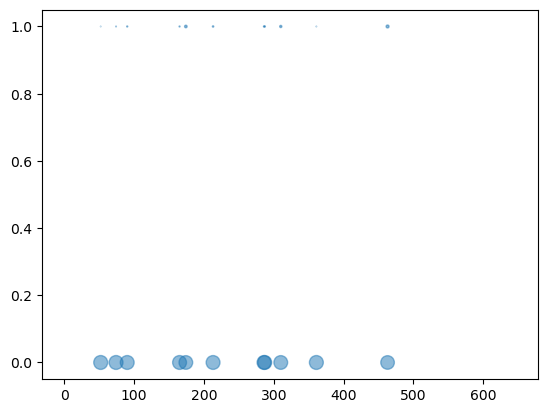

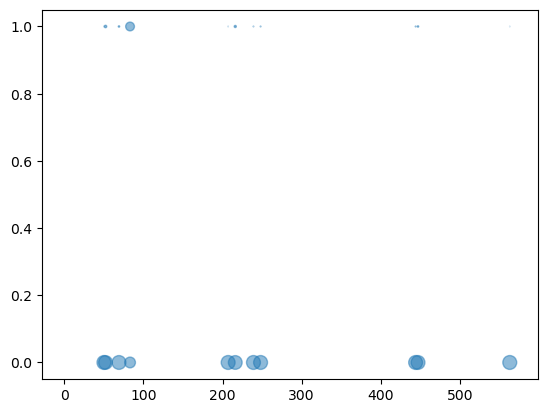

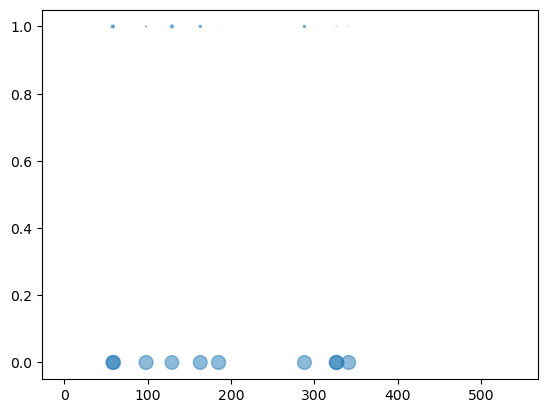

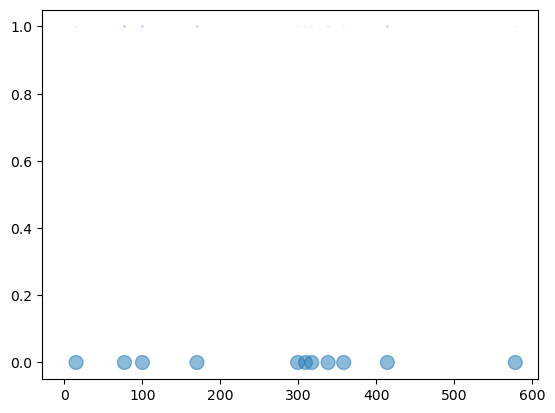

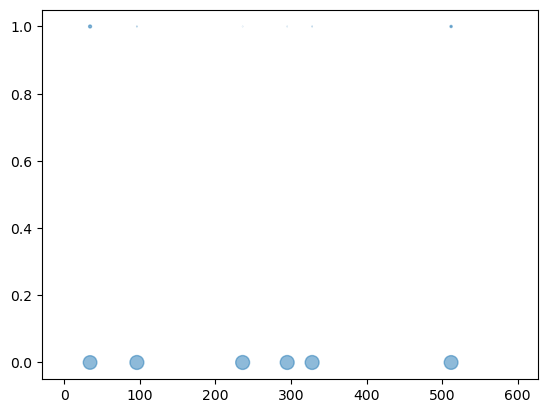

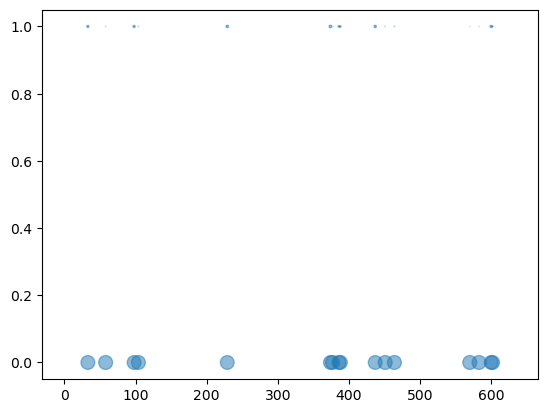

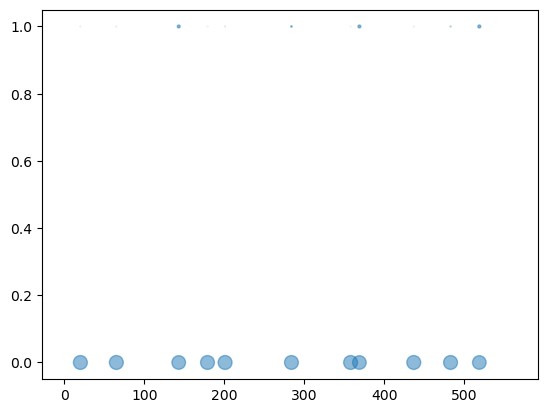

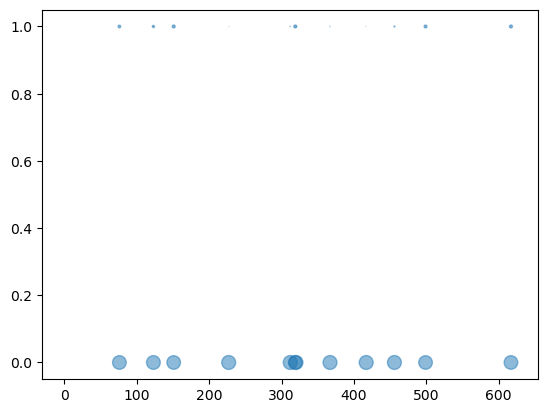

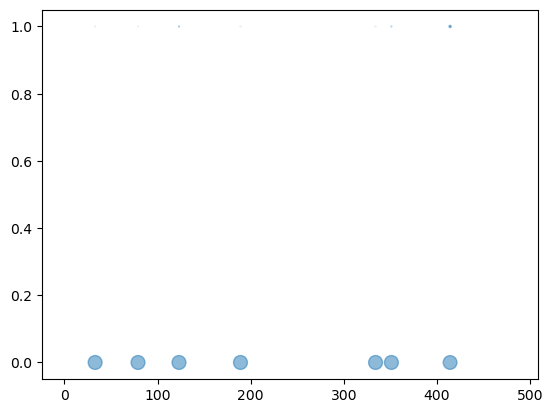

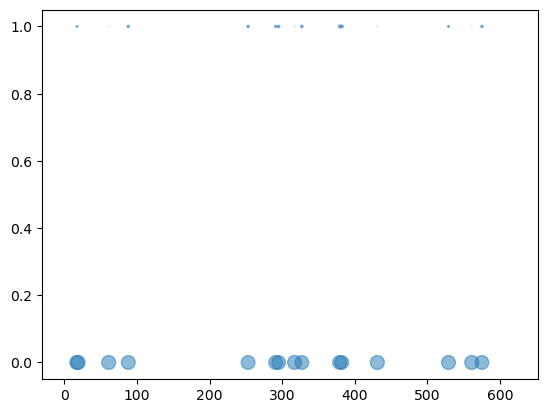

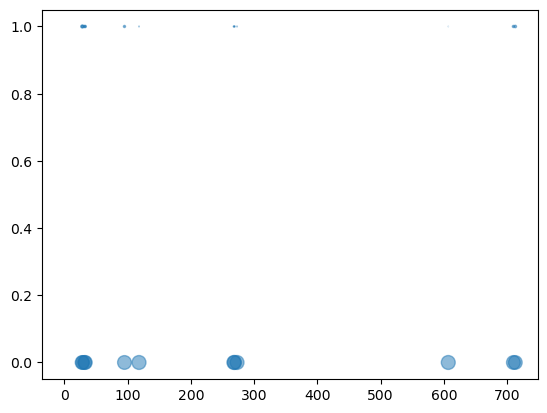

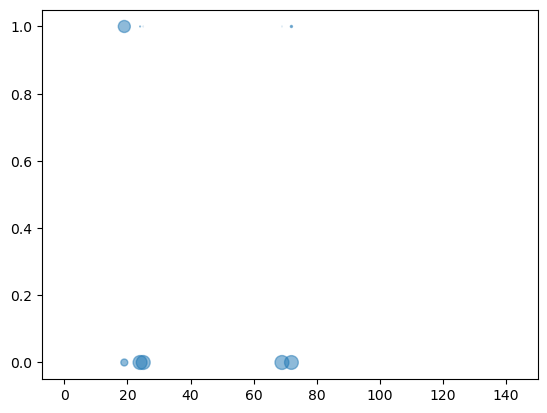

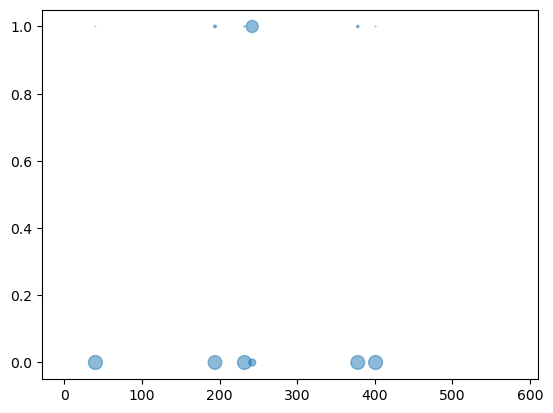

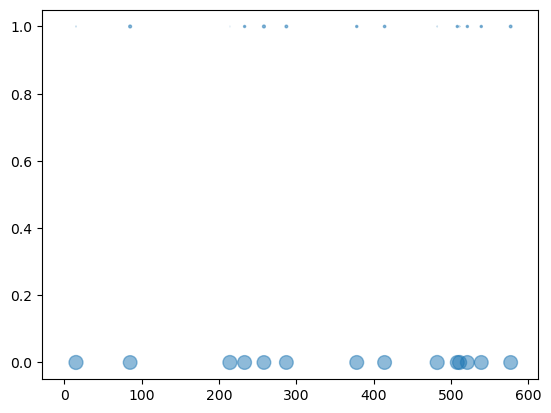

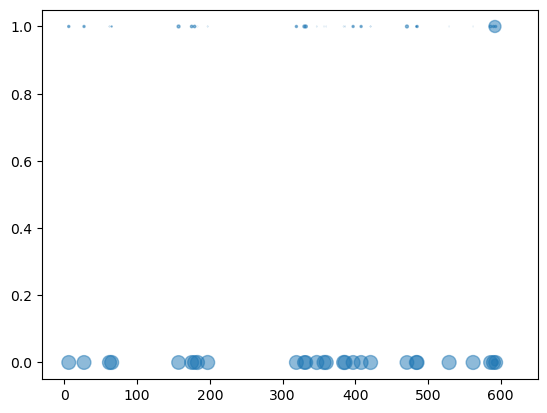

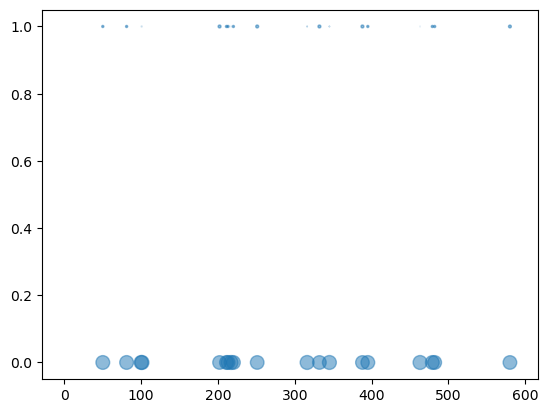

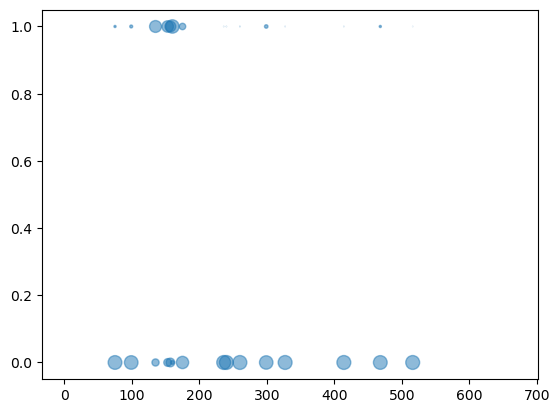

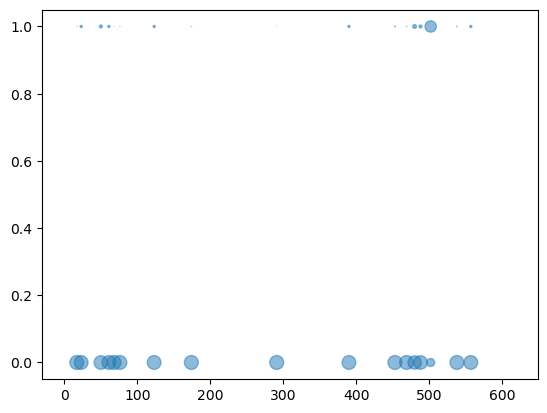

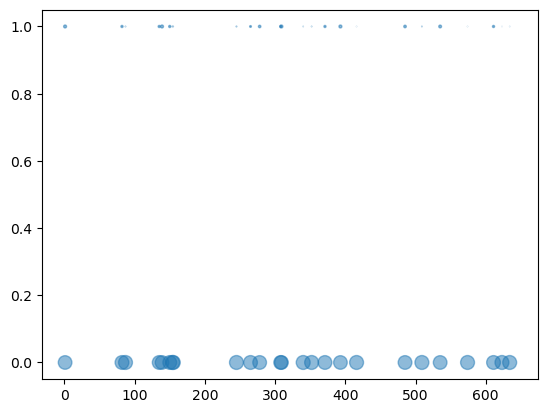

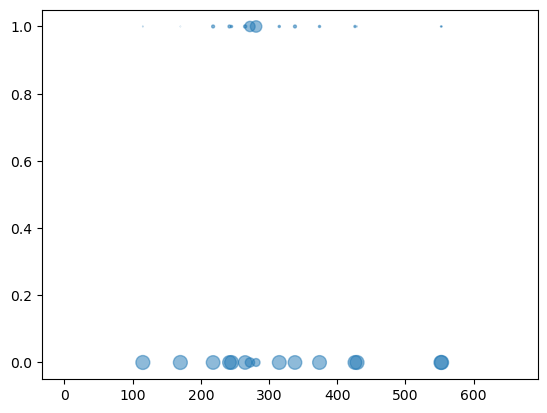

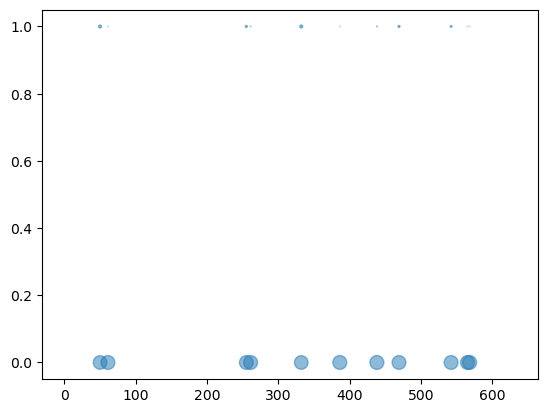

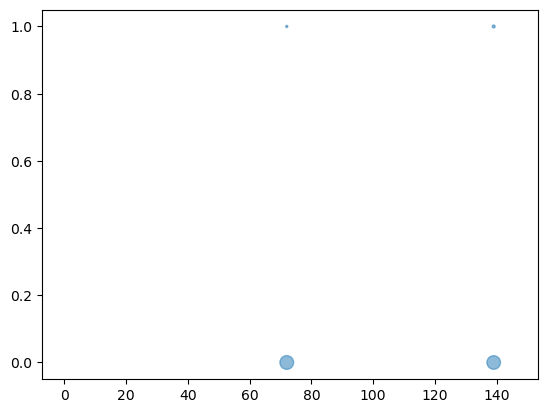

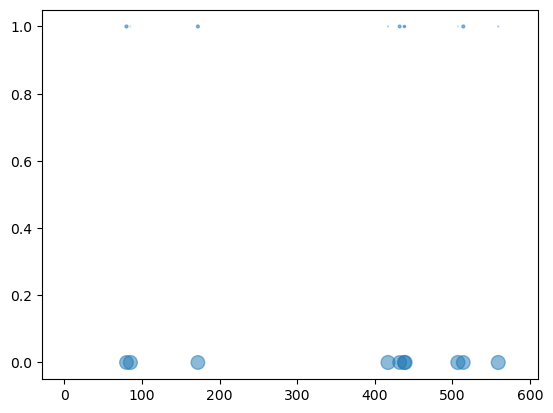

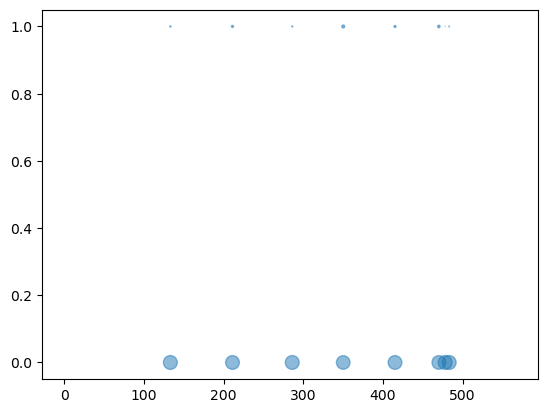

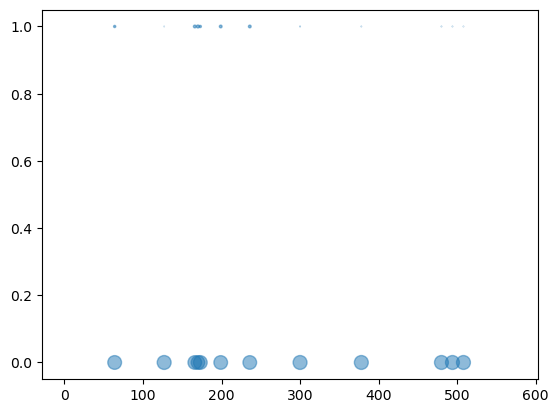

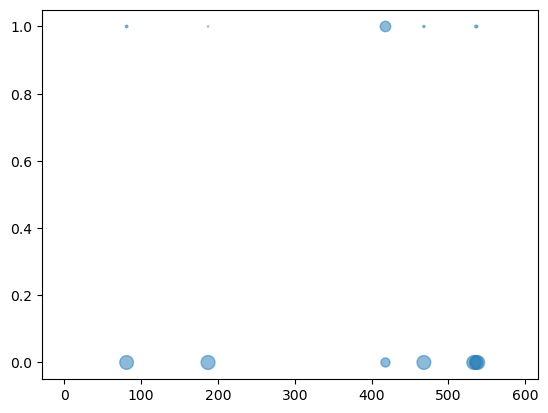

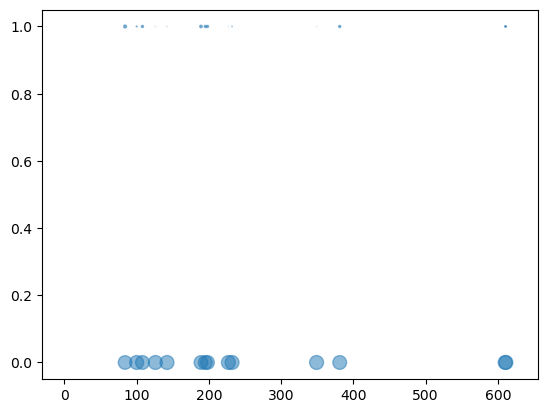

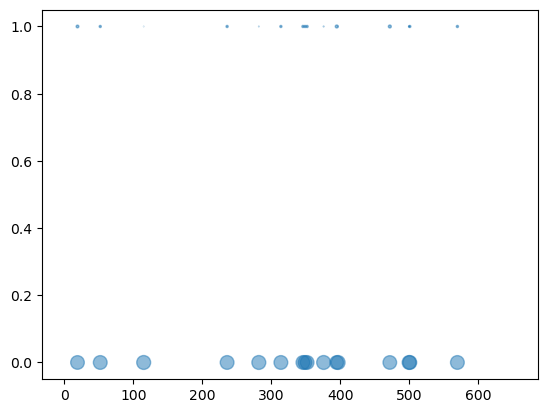

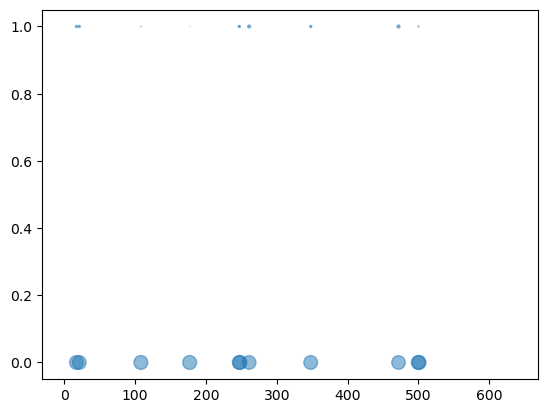

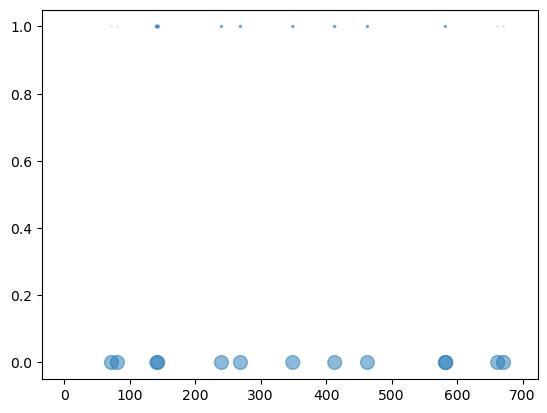

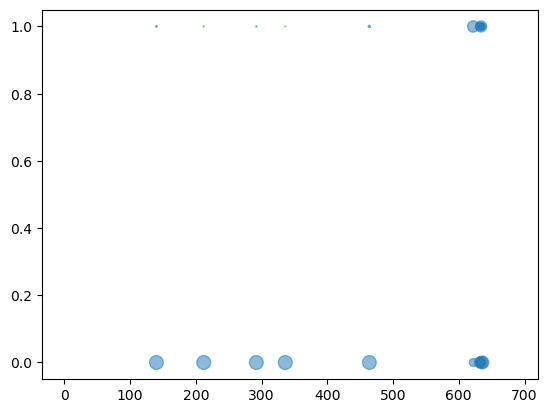

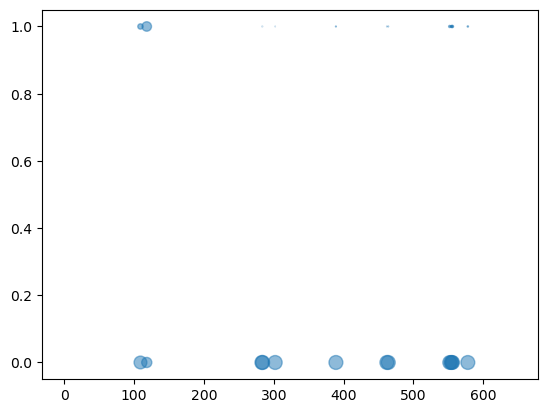

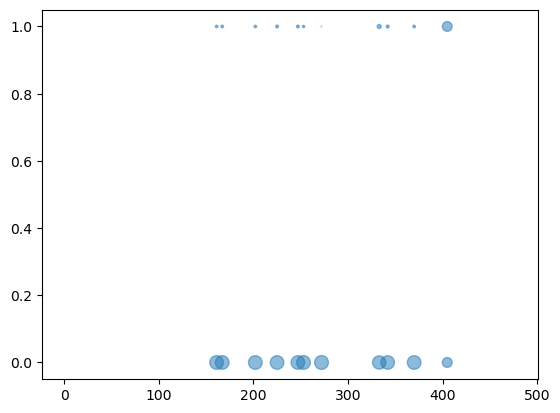

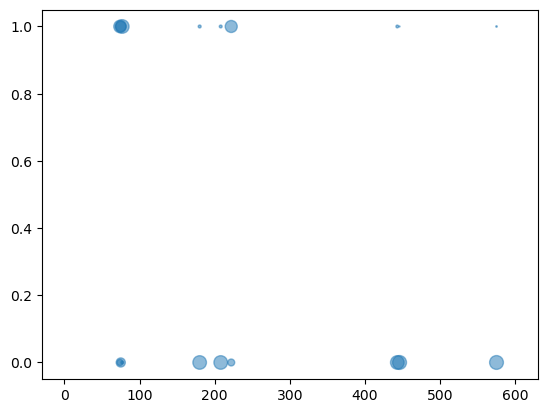

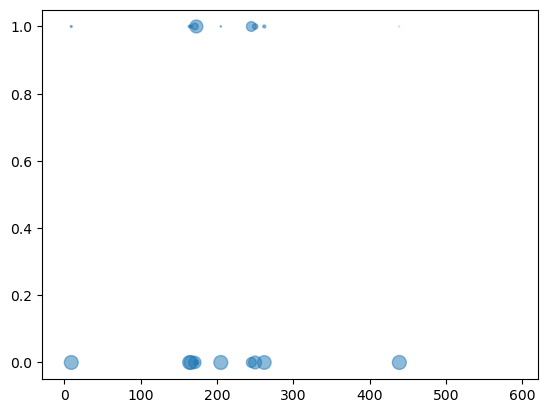

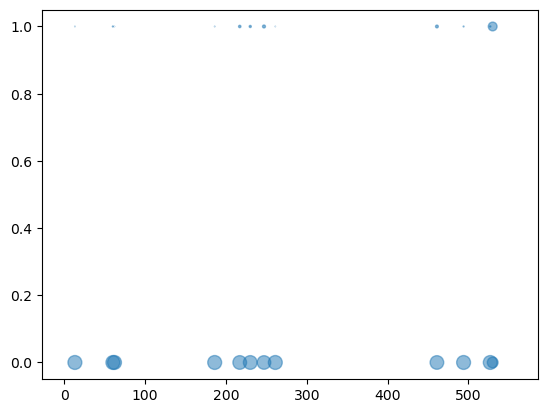

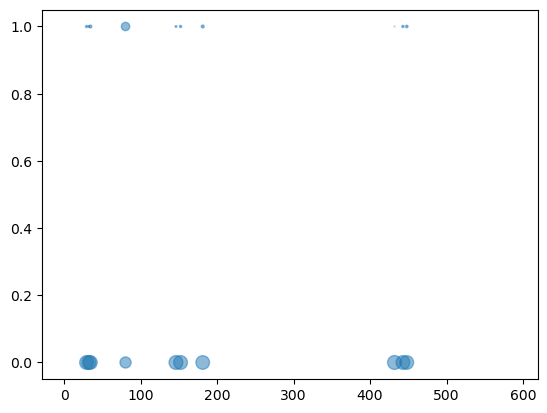

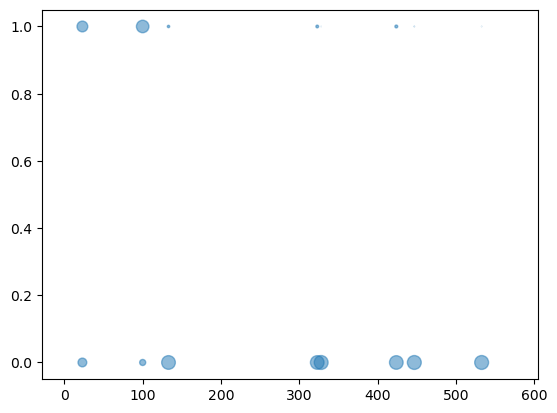

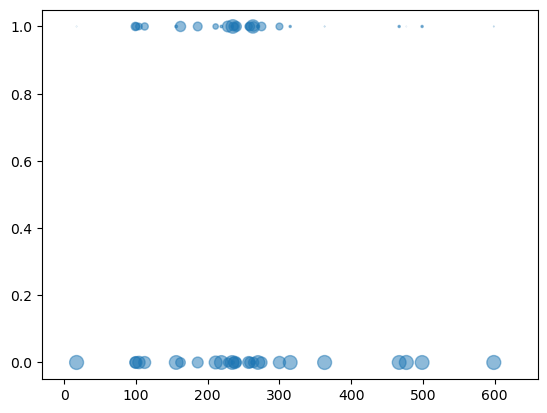

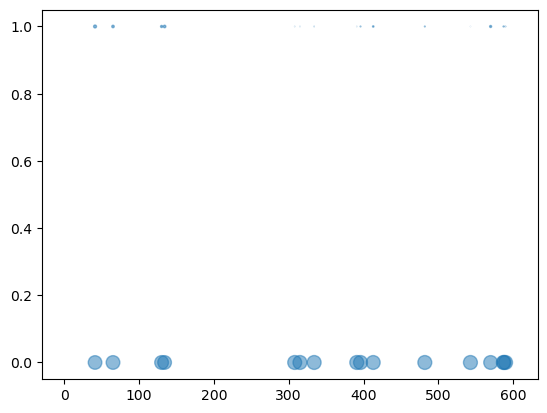

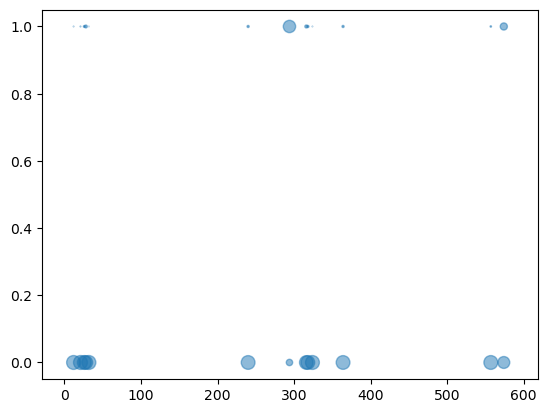

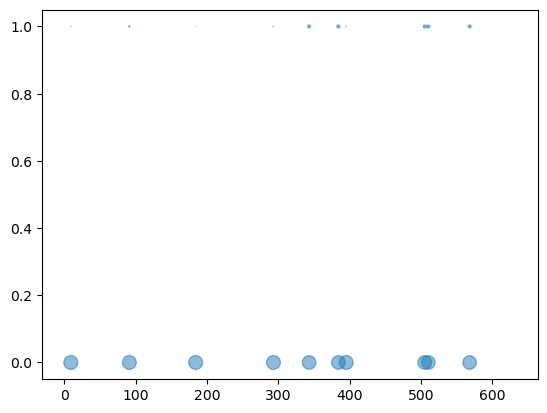

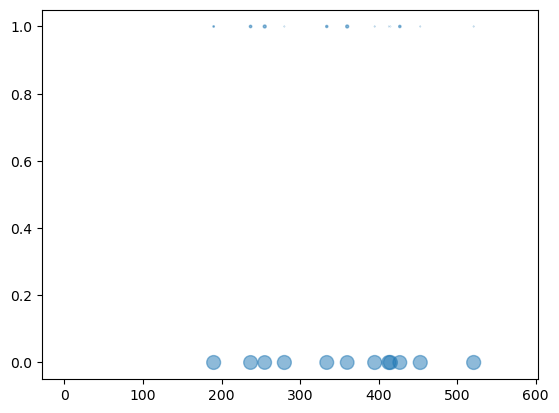

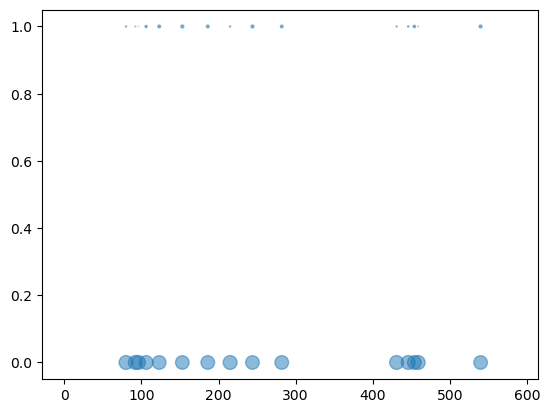

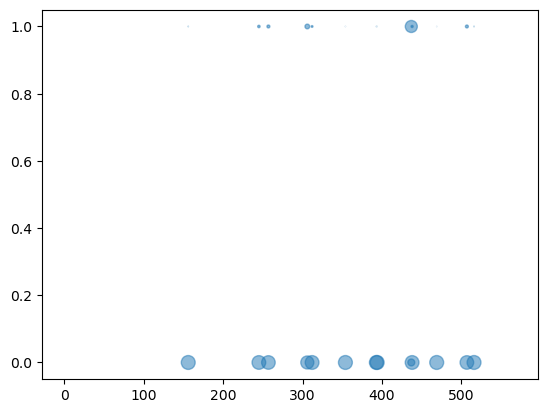

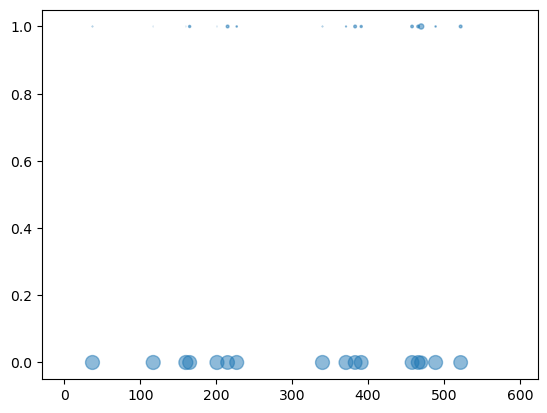

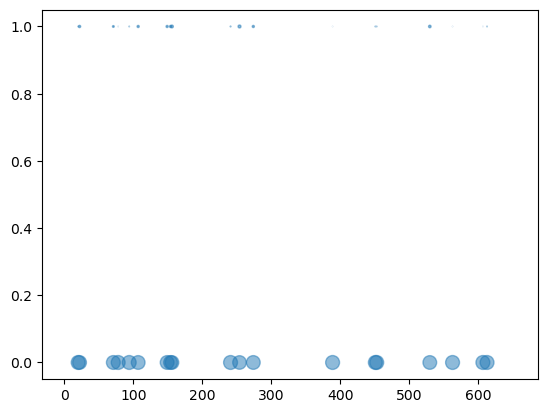

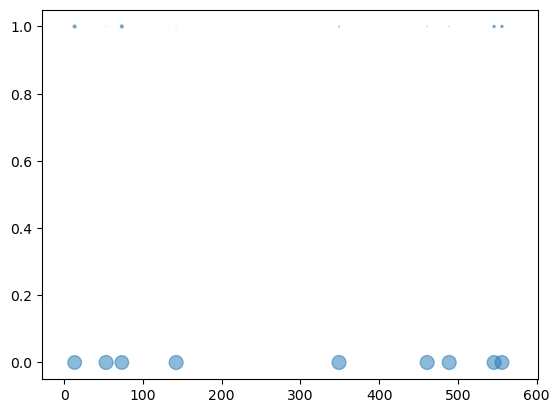

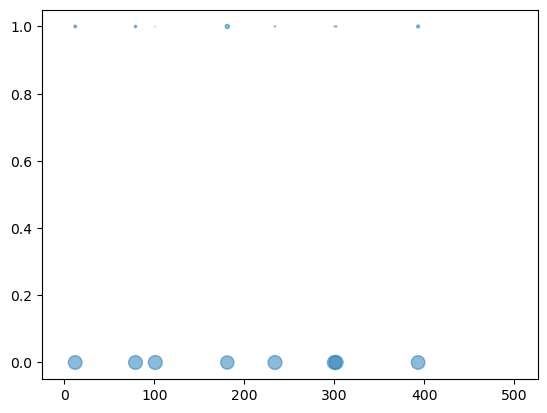

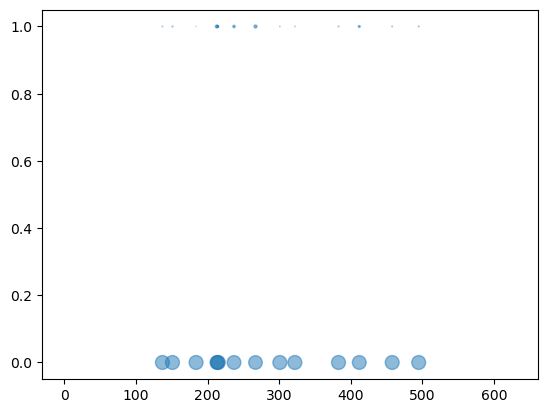

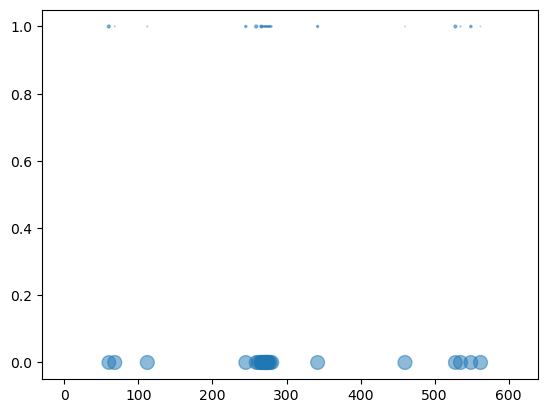

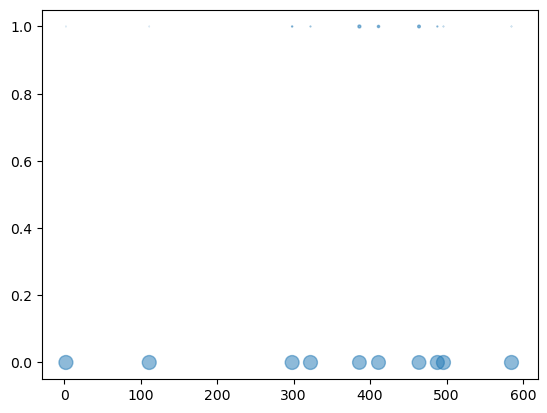

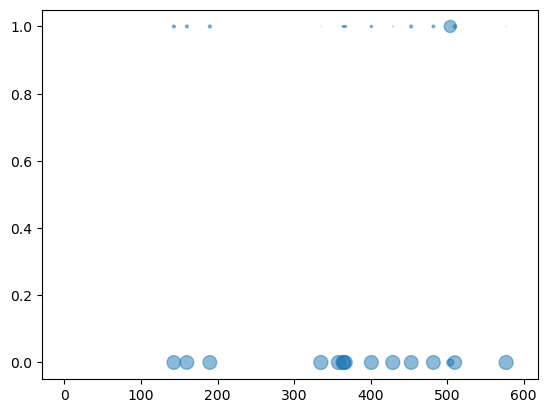

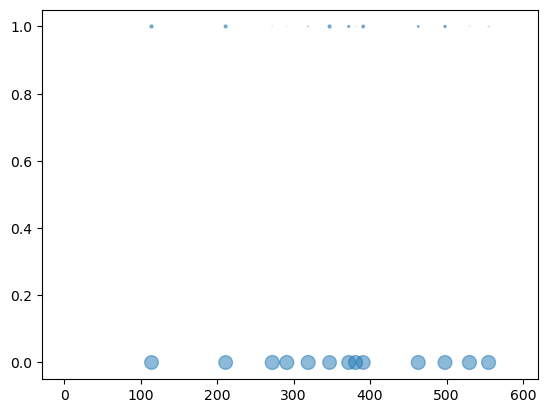

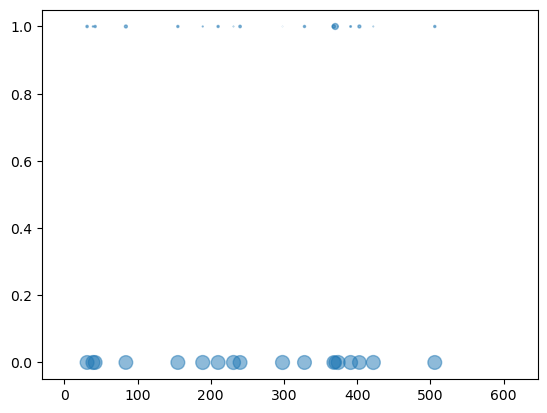

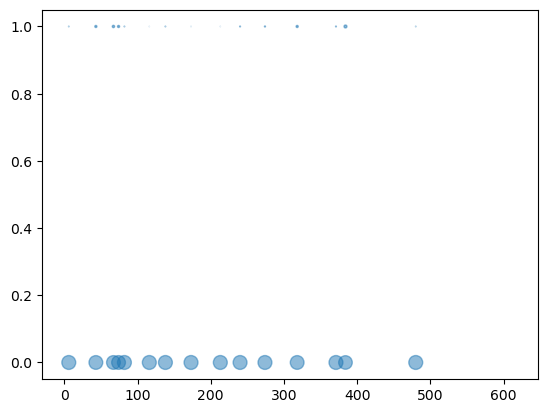

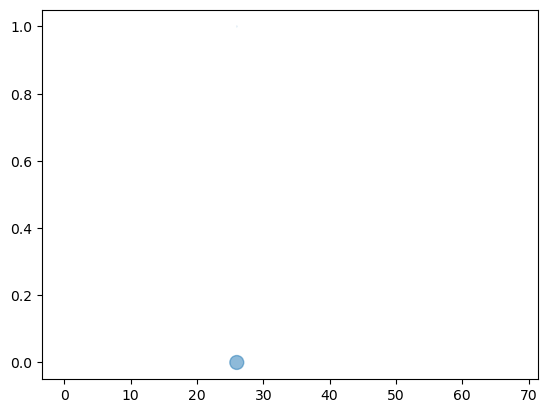

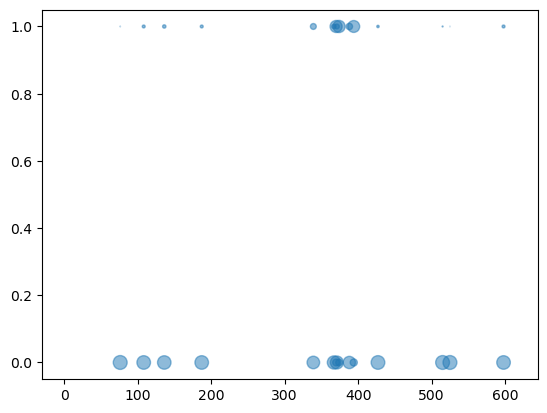

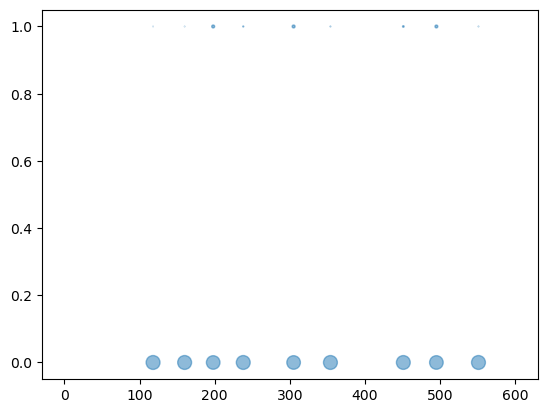

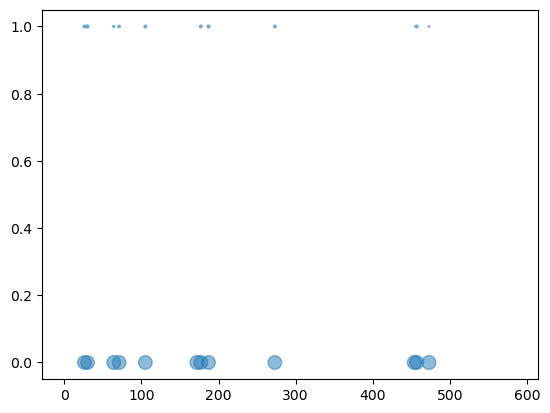

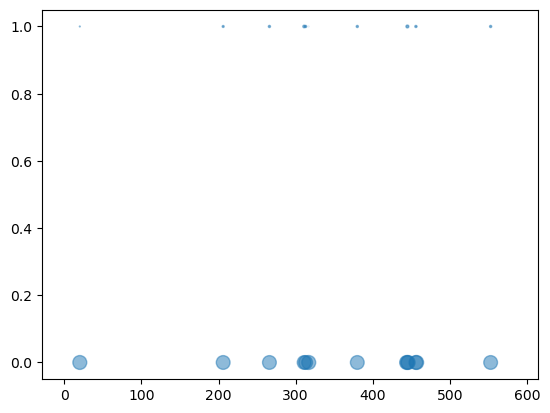

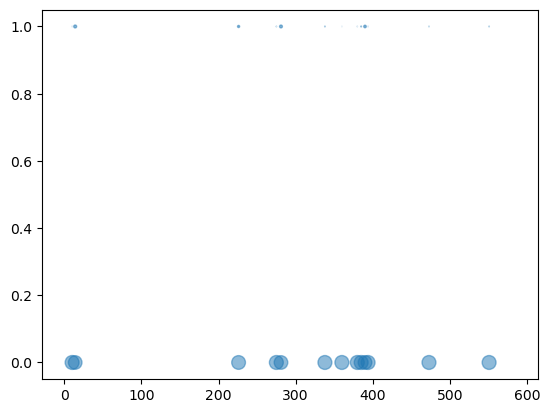

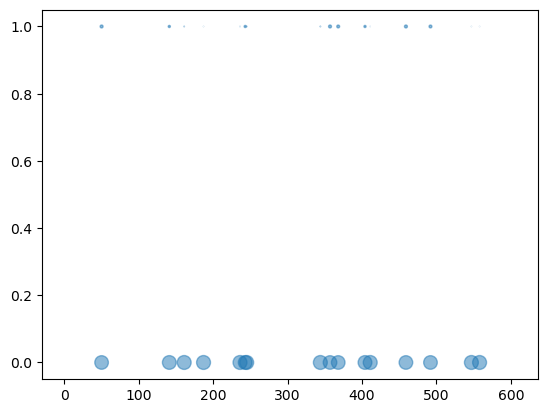

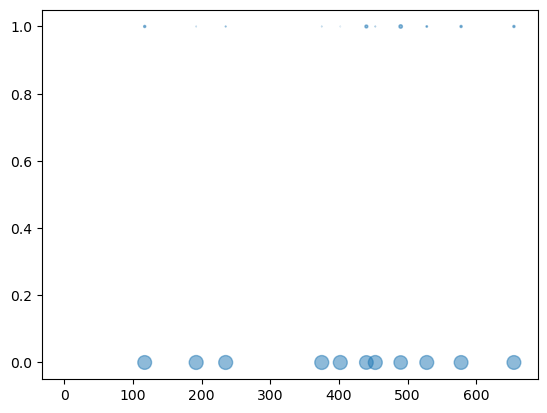

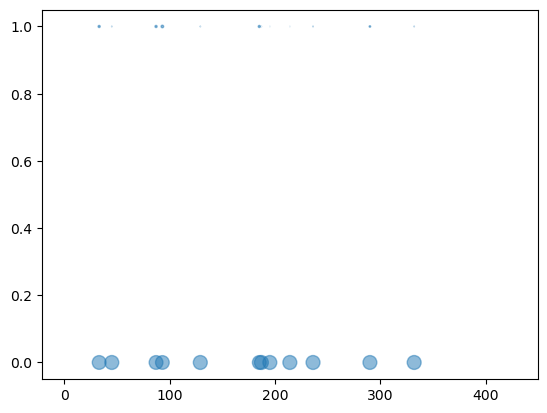

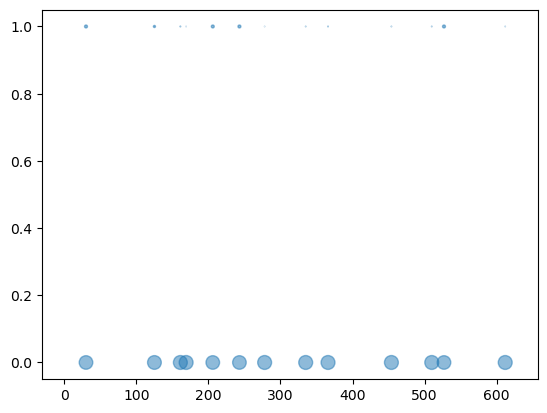

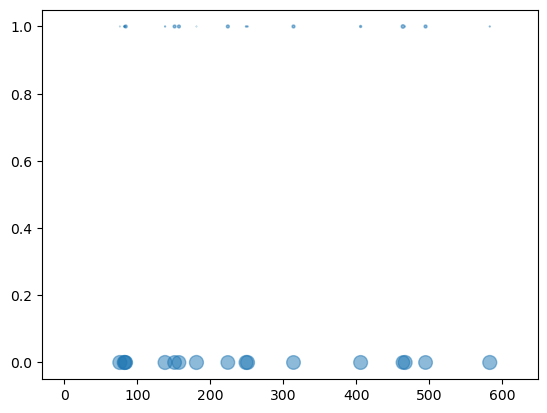

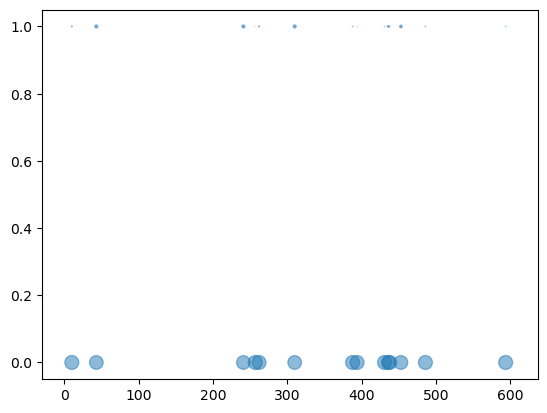

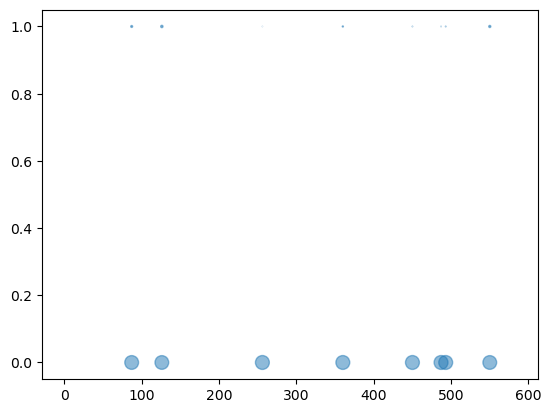

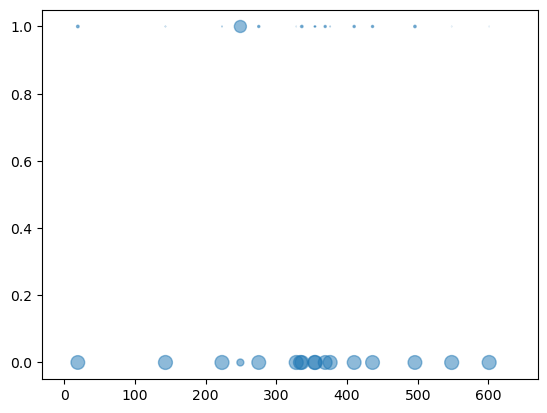

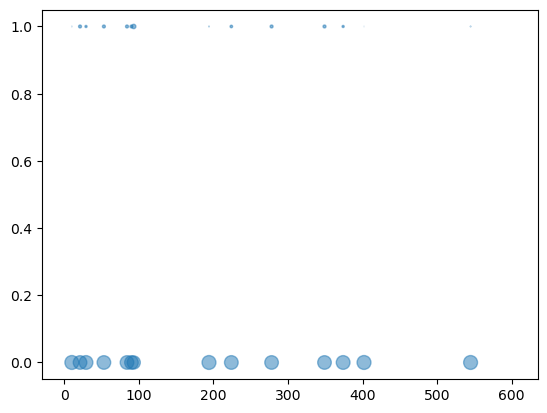

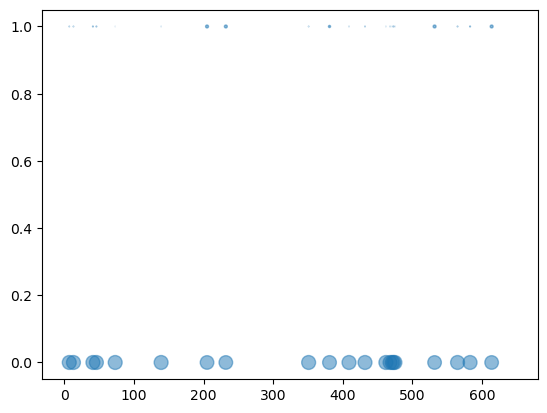

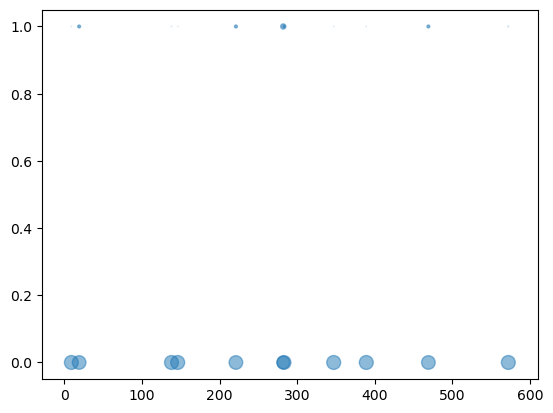

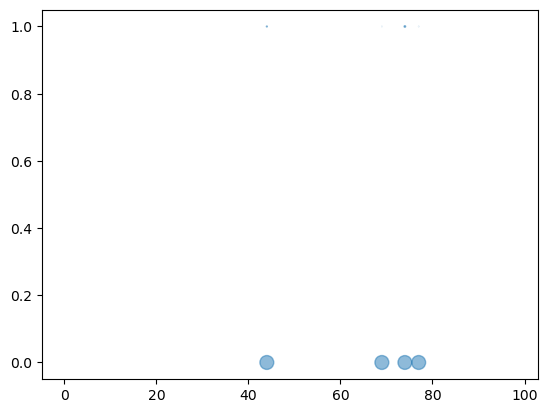

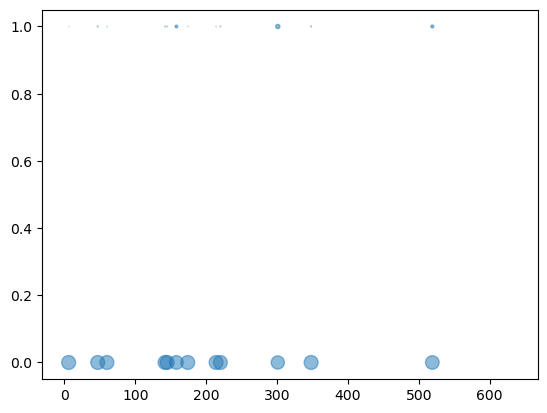

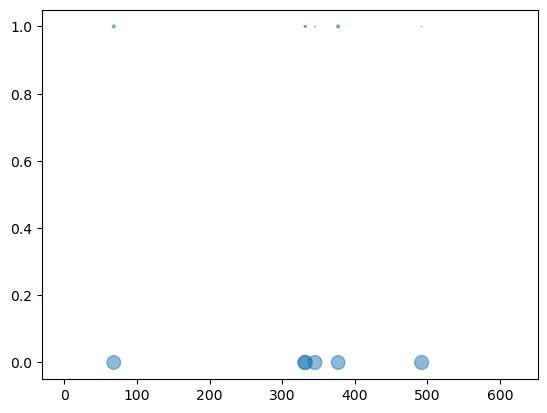

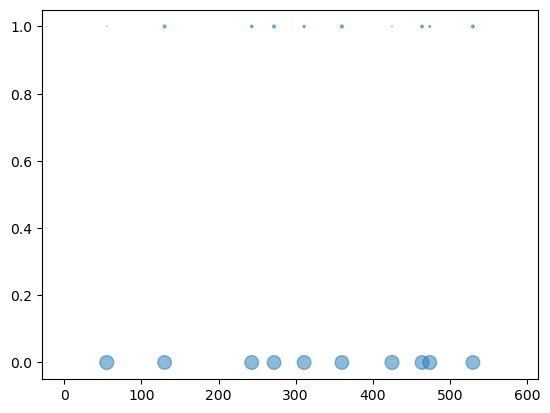

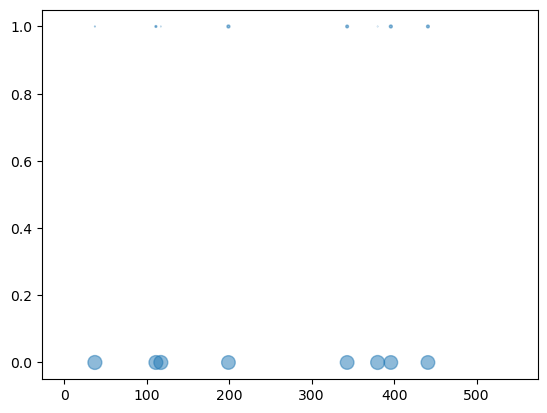

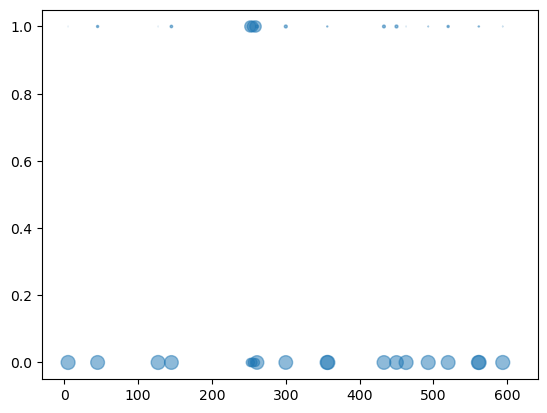

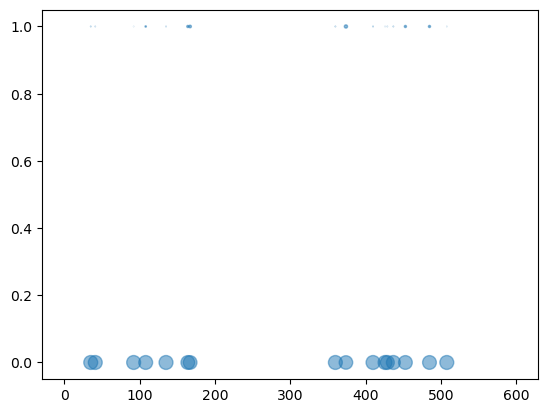

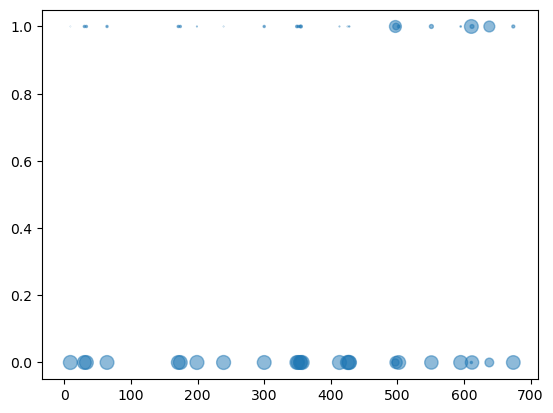

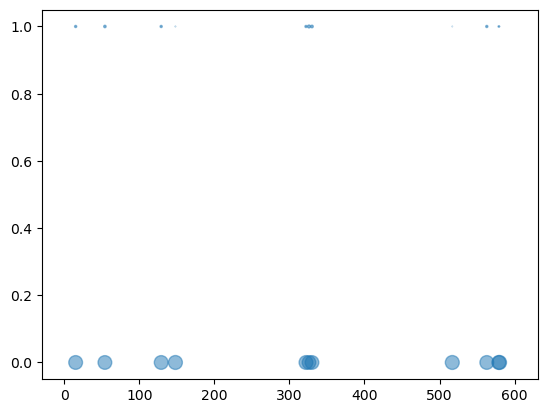

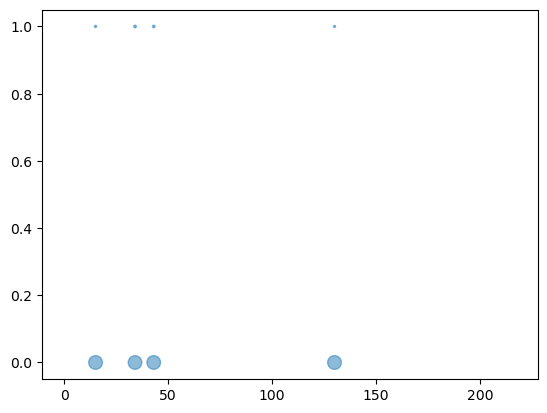

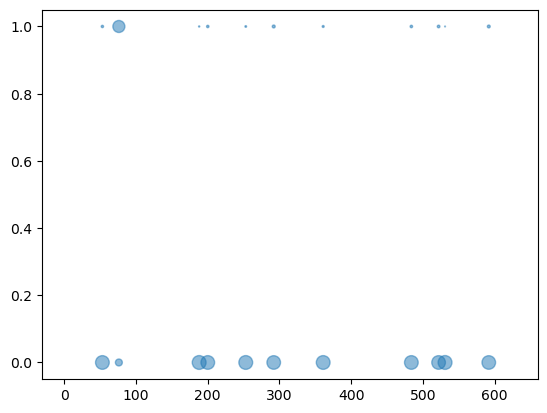

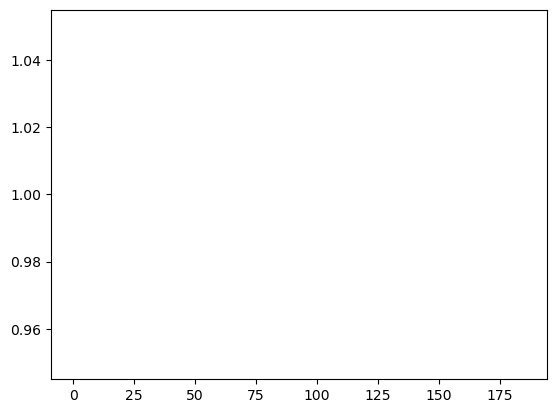

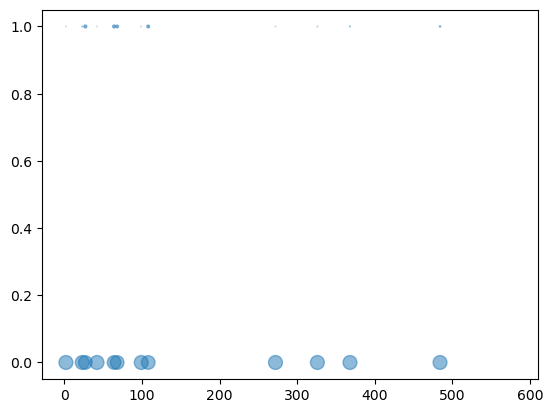

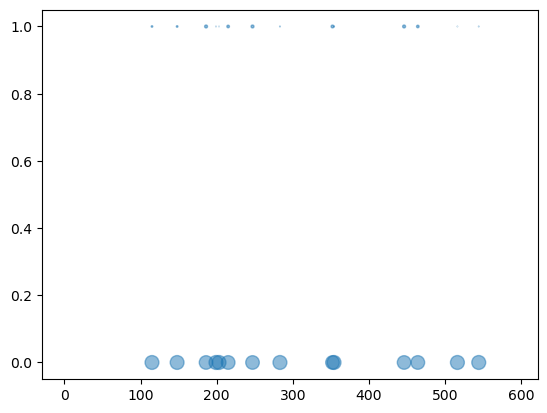

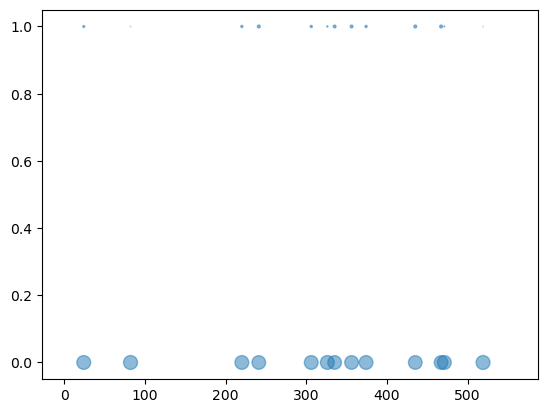

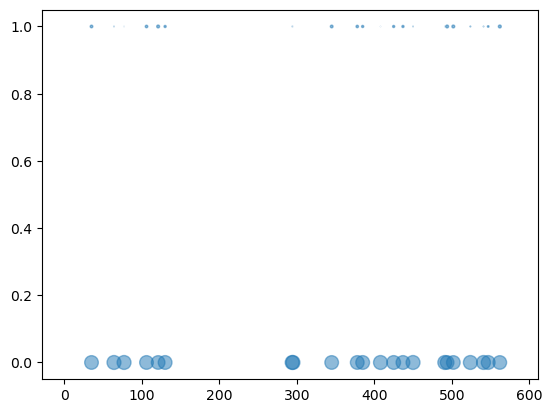

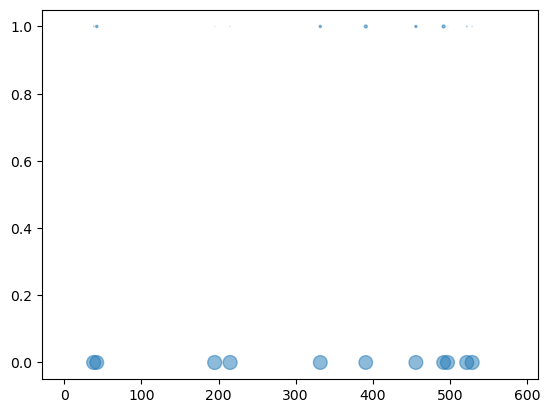

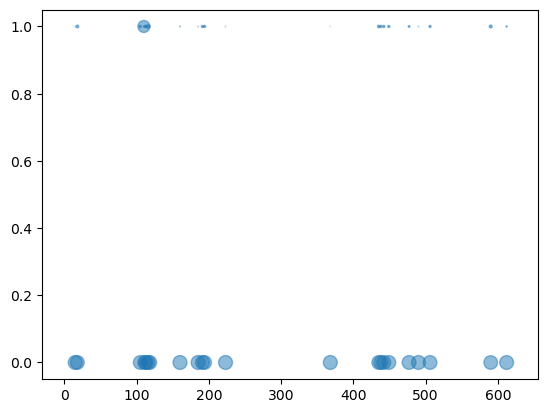

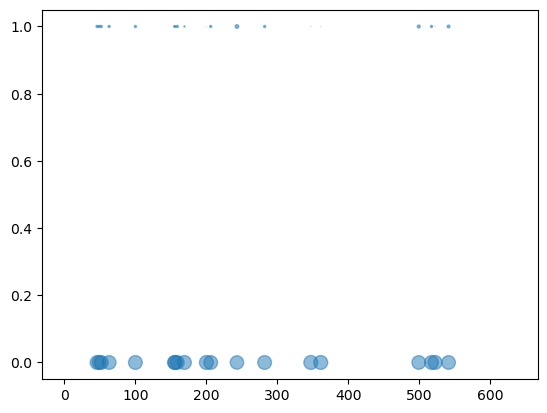

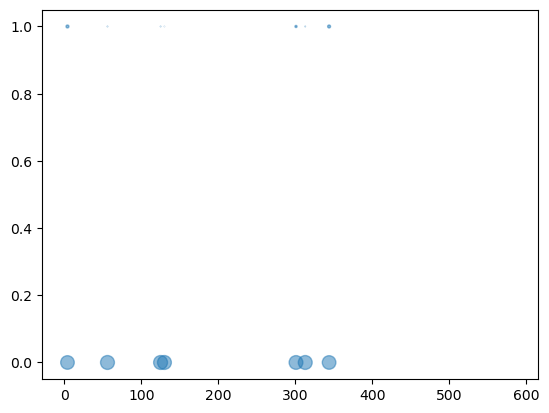

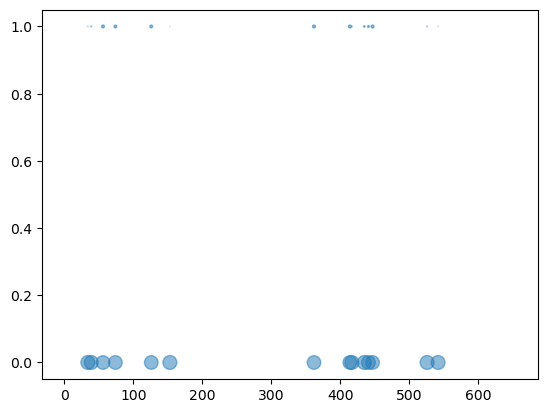

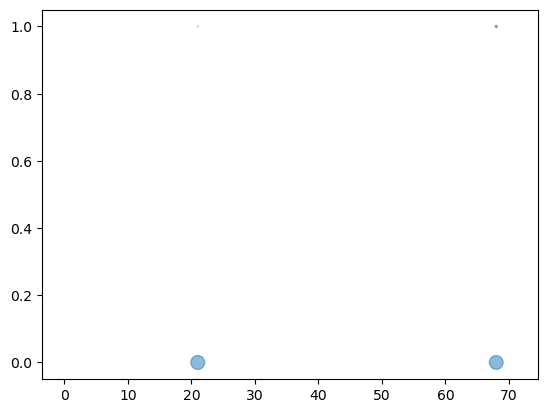

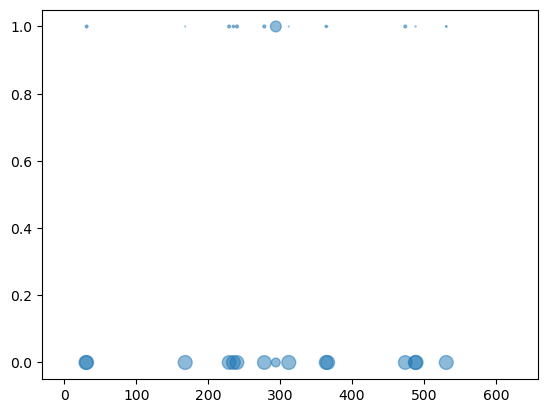

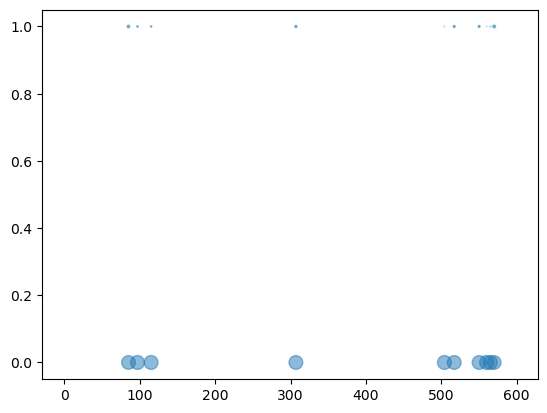

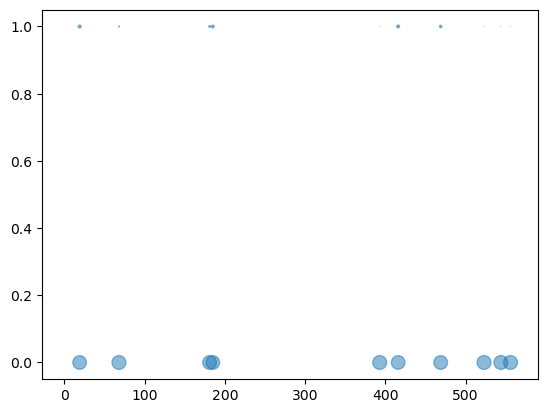

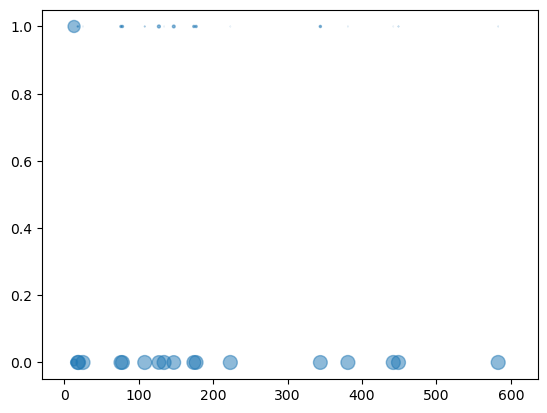

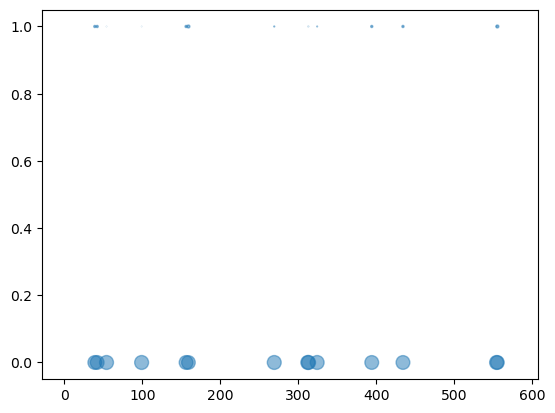

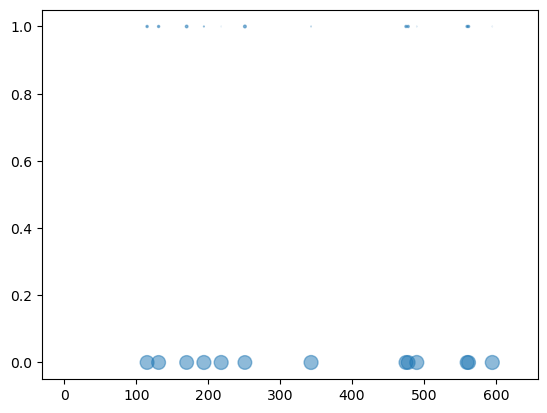

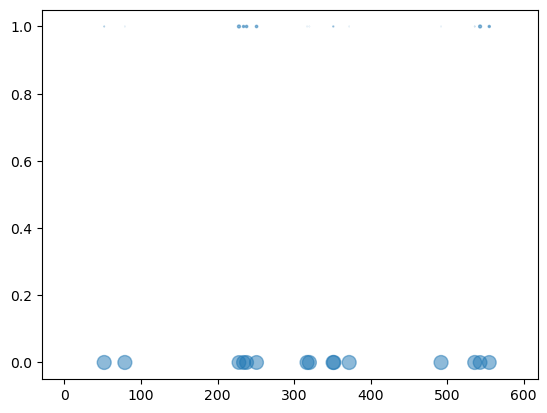

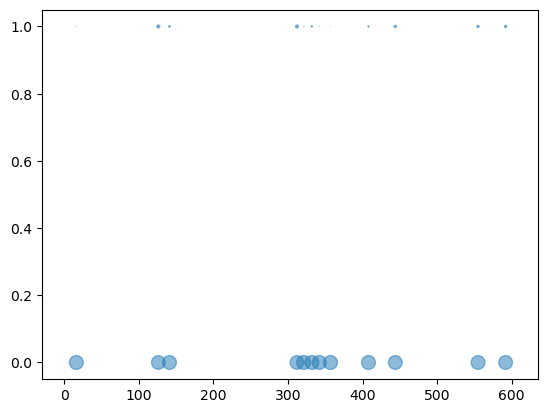

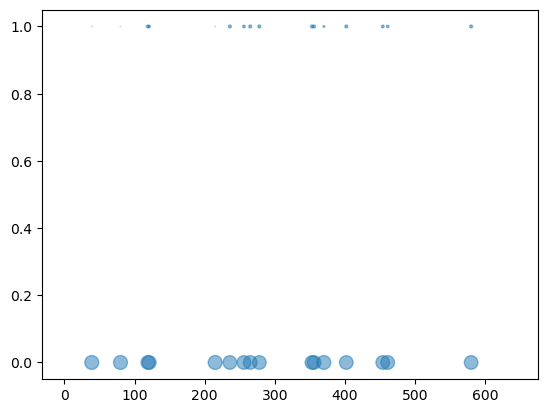

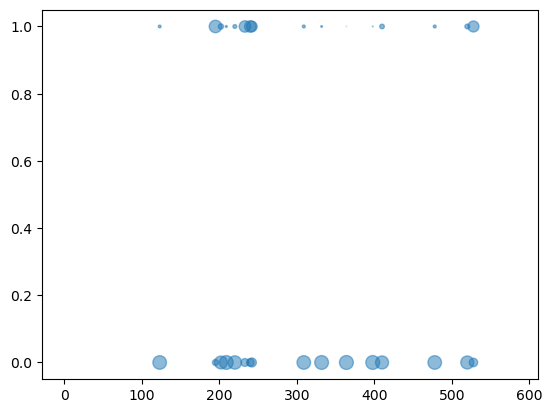

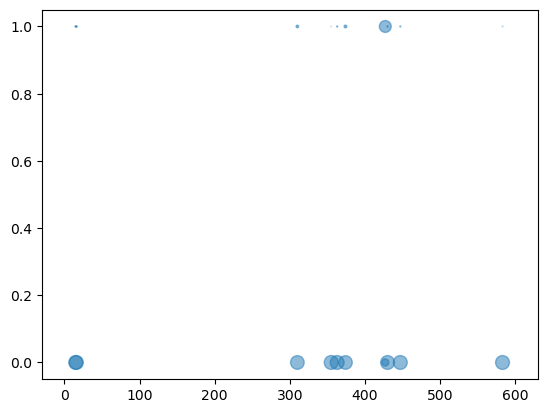

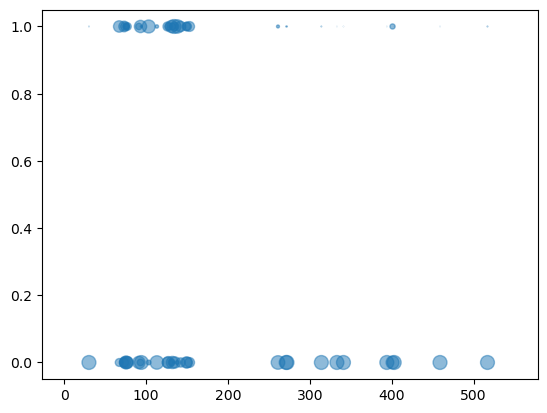

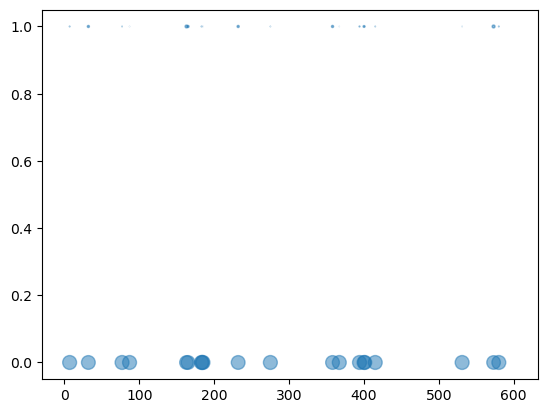

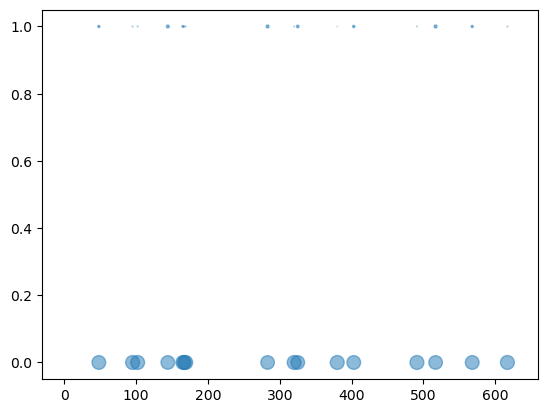

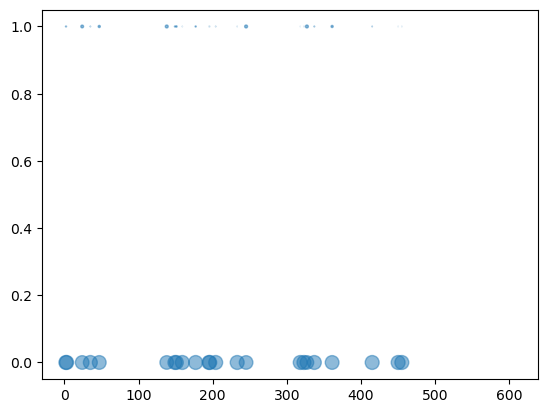

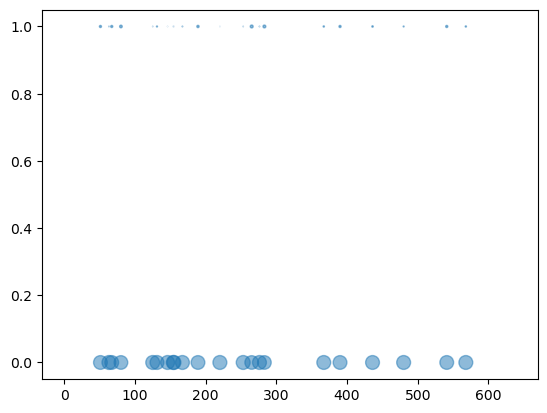

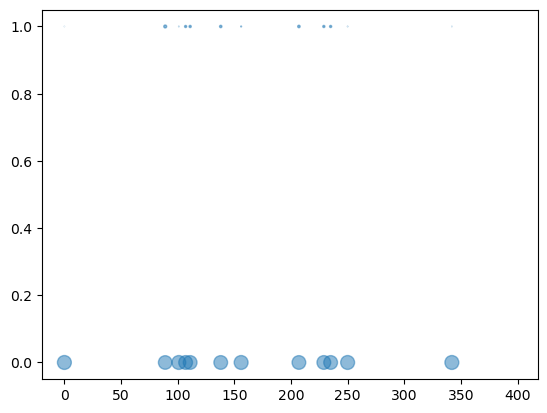

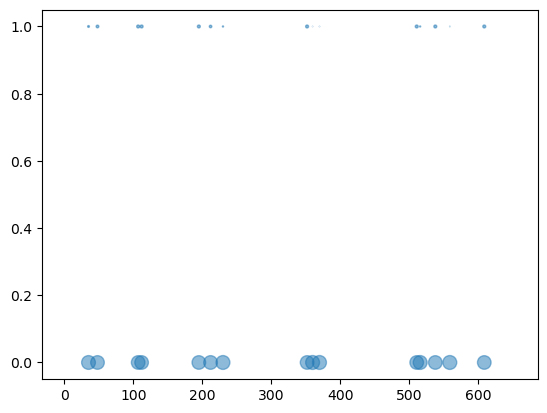

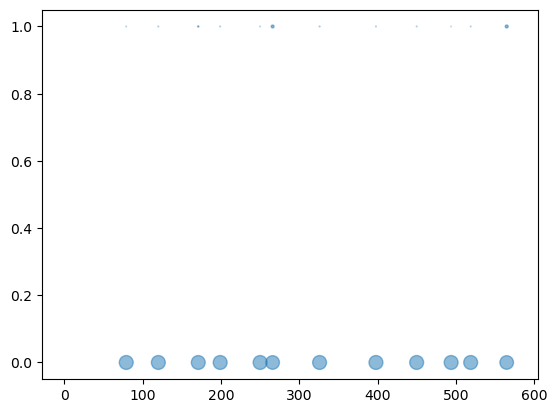

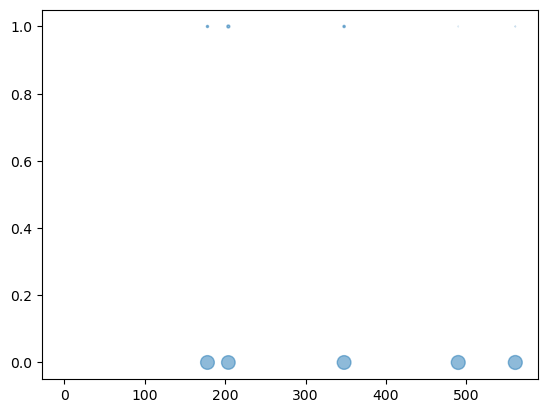

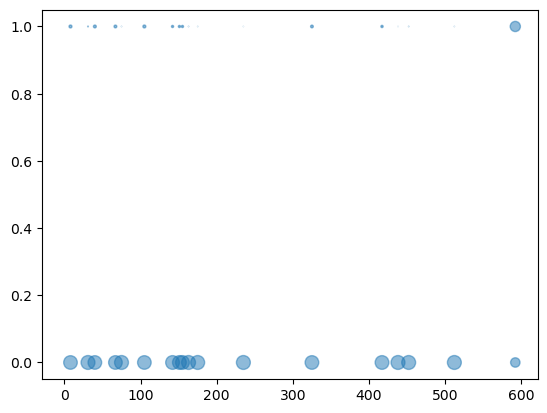

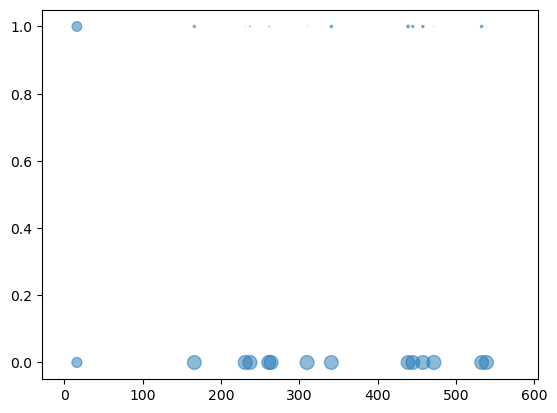

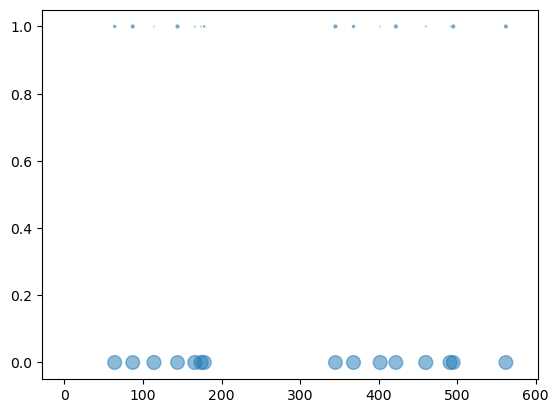

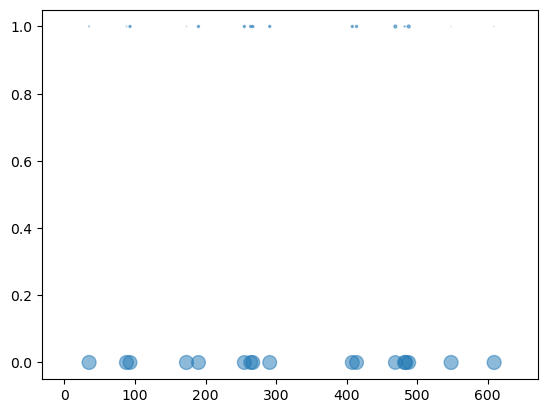

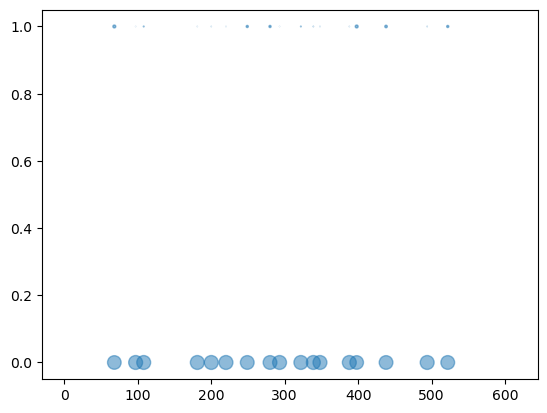

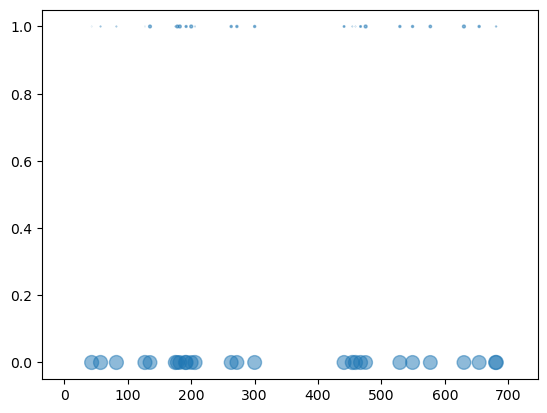

In [4]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import random
from collections import Counter
import shutil

for folder_name in data_folders:
    # print(folder_name)
    # 跳过已读取的文件
    if folder_name in exception_folders or folder_name in instruction_folders:
        print("----- Jumping "+folder_name+" -----")
        continue
    print("----- Reading "+folder_name+" -----")
    # 指定文件夹路径
    folder_path = os.path.join(download_path, folder_name)
    mat_names = os.listdir(folder_path)
    # 初始化分布记录列表
    data_distribution = []
    for mat_name in mat_names:
        # 读取MAT文件
        mat_id = mat_names.index(mat_name)
        mat_file = os.path.join(folder_path, mat_name)
        data = loadmat(mat_file)

        # 读取数据
        wind_shear = data['WSHR']
        wind_shear_data = wind_shear[0][0][0] # (n * 1) array
        # print(wind_shear.shape)
        # print(wind_shear[0][0][0].shape)

        # x = np.linspace(0, wind_shear[0][0][0].shape[0]-1, wind_shear[0][0][0].shape[0])
        # plt.scatter(x, wind_shear[0][0][0])
        # plt.show()

        # 记录分布
        data_num = wind_shear_data.shape[0]
        value_counts = Counter(wind_shear_data[:,0])
        if len(value_counts) > 1:
            if not os.path.exists(os.path.join(exception_save_path, folder_name)):
                os.makedirs(os.path.join(exception_save_path, folder_name))
            target_file = os.path.join(exception_save_path, folder_name, mat_name)
            shutil.copy(mat_file, target_file)
        for value, count in value_counts.items():
            # print(value, count, data_num)
            data_distribution.append([mat_id, value, count/ data_num])
    data_distribution = np.array(data_distribution).T
    x = data_distribution[0]
    y = data_distribution[1]
    fre = data_distribution[2]
    # print(fre)
    plt.figure()
    plt.scatter(x, y, s=(1-fre)*100, alpha=0.5)
    plt.savefig(os.path.join(plt_save_path, folder_name + '_revFre.png'))